## CALLIING THE REQUIRED PACKAGES 

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV

## LOADING THE DATA

In [2]:
os.chdir(r"D:\uci datasets\skill_craft")#setting working directory

In [3]:
os.listdir()#getting list of files in the directory

['c.csv',
 'corr.csv',
 'eigen.csv',
 'pone.0075129.pdf',
 'SkillCraft1_Dataset.csv',
 'var.csv']

In [4]:
g=pd.read_csv("SkillCraft1_Dataset.csv")#loading the data set 

<span style=color:red>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

## Getting the basic of loaded data

In [5]:
g.shape# getting no. of rows and no. of columns in the dataset

(3395, 20)

There are total 20 attributes (variables) and 3395 records

In [6]:
g.info()#basic information about the attributes and  their data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

Their are total 20 columns out of which 3 are having object data types and rest are numerical data    

In [7]:
g.head()

GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   
2      56            4  30           10        200   69.9612         0.001101   
3      57            3  19           20        400  107.6016         0.001034   
4      58            3  32           10        500  122.8908         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220              7        0.000110            0.000392   
1         0.000259              4        0.000294            0.000432   
2         0.000336              4        0.000294            0.000461   
3         0.000213              1        0.000053            0.000543   
4         0.000327              2        0.000000            0.001329   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.004849         32.6677        40.8673        4.7508   
1      0.004307         32.9194        42.3454        4.8434   
2      0.002926         44.6475        75.3548        4.0430   
3      0.003783         29.2203        53.7352        4.9155   
4      0.002368         22.6885        62.0813        9.3740   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0                28     0.001397                6               0.0   
1                22     0.001193                5               0.0   
2                22     0.000745                6               0.0   
3                19     0.000426                7               0.0   
4                15     0.001174                4               0.0   

   ComplexAbilitiesUsed  
0              0.000000  
1              0.000208  
2              0.000189  
3              0.000384  
4              0.000019

# Attribute Information:

1. GameID: Unique ID number for each game (integer)


2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)


3. Age: Age of each player (integer)


4. HoursPerWeek: Reported hours spent playing per week (integer)


5. TotalHours: Reported total hours spent playing (integer)


6. APM: Action per minute (continuous)


7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)


8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)


9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)


10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)


11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)


12. NumberOfPACs: Number of PACs per timestamp (continuous)


13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)


14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)


15. ActionsInPAC: Mean number of actions within each PAC (continuous)


16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)


17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)


18. UniqueUnitsMade: Unique unites made per timestamp (continuous)


19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)


20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)


 #**ComplexAbilitiesUsed is our target variable**#


- We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action.
- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.
- List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)




# <span style=color:Brown>Feature Engineering</span>

### Let's get deep understanding of our **TARGET VARIABLE - ComplexAbilitiesUsed**

In [8]:
g["ComplexAbilitiesUsed"].describe()

count    3395.000000
mean        0.000142
std         0.000265
min         0.000000
25%         0.000000
50%         0.000020
75%         0.000181
max         0.003084
Name: ComplexAbilitiesUsed, dtype: float64

### As it conveys, 

-  Our target variable is continous and it is between 0 to .003084 
-  ***Mean is less than standard deviation*** which means their are **lots of outliers** in it.
-  No missing values.


Let's move further to know more about the percentile distribution.  

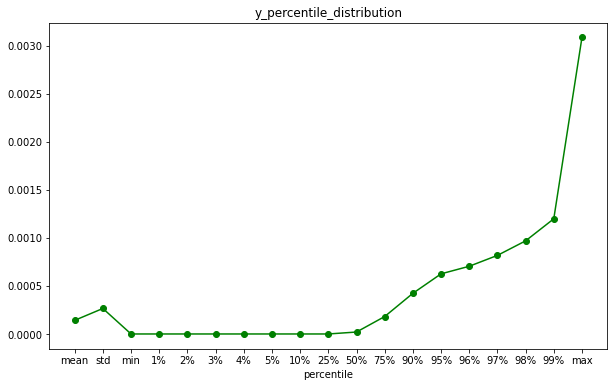

In [9]:
y=g["ComplexAbilitiesUsed"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="green", marker="o")
plt.xlabel("percentile")
plt.title("y_percentile_distribution")
plt.show()

### As depicted in graph,

-  Upto 25 percentile players donot pocess the ability of complex thinking as per time stamp.
-  from 50 percentile outliers come to picture.
-  from 50 percentile to 95 percentile growth is rapid but from 95 Percentile to 96 percentile change is not sudden but after that change is sudden and in between 99 percentile to 100 percentile change is sky high.

Let's understand about outliers how they are distributed 

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


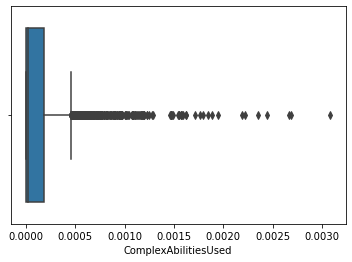

In [10]:
sns.boxplot(g["ComplexAbilitiesUsed"])
plt.show()

### As depicted in the boxplot,

- **Most of the outliers are on upper side.** 

- On lower side there are no outliers as upto first quatile value is same.




In [11]:
g["ComplexAbilitiesUsed"].nunique()# for getting the knowledge of how many unique values are present.

1828

### There are 3395 record out of which 1828 records are unique and rest is repetition of  them in the TARGET VARIABLE

In [12]:
g["ComplexAbilitiesUsed"].value_counts()# to get count of each value.

0.000000    1552
0.000150       2
0.000020       2
0.000064       2
0.000189       2
            ... 
0.000206       1
0.000076       1
0.000058       1
0.000028       1
0.000201       1
Name: ComplexAbilitiesUsed, Length: 1828, dtype: int64

From above we can conclude that ,
-  more than 40% of data contain **0**.
-  other than 0 every value is repeated either *1 times or 2 times*.

**from  above we can conclude that,**

In our target variable contain **lots of outliers** and also that *one value* can ***easily hijack*** the other values and can make our **model week**.

So, in order to counter both problems Let's convert our **target variable from continous to categorical**.  

In [13]:
#0 says that player pocess the complex thinking abilities 
#1 says that player do not pocess the complex thinking abilities 
def classification(x):
    if x>0.000000:
        return 0
    else:
        return 1

In [14]:
g["classification"]=g["ComplexAbilitiesUsed"].apply(classification)#applying the function

In [15]:
g.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed', 'classification'],
      dtype='object')

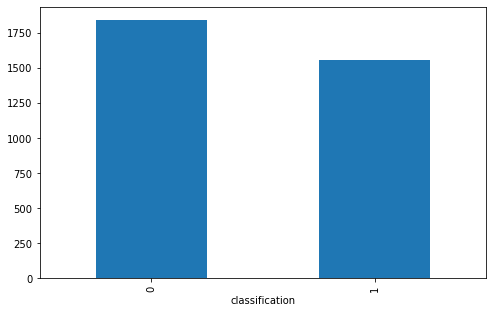

In [16]:
g["classification"].value_counts().plot(kind="bar",figsize=(8,5),xlabel="classification")
plt.show()# to get the graphical representaion of classification .

In [17]:
#since our target variable is changed so dropping the previous one.
g.drop(columns=["ComplexAbilitiesUsed"],inplace=True) 

In [18]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3395 non-null   object 
 3   HoursPerWeek        3395 non-null   object 
 4   TotalHours          3395 non-null   object 
 5   APM                 3395 non-null   float64
 6   SelectByHotkeys     3395 non-null   float64
 7   AssignToHotkeys     3395 non-null   float64
 8   UniqueHotkeys       3395 non-null   int64  
 9   MinimapAttacks      3395 non-null   float64
 10  MinimapRightClicks  3395 non-null   float64
 11  NumberOfPACs        3395 non-null   float64
 12  GapBetweenPACs      3395 non-null   float64
 13  ActionLatency       3395 non-null   float64
 14  ActionsInPAC        3395 non-null   float64
 15  TotalMapExplored    3395 non-null   int64  
 16  Worker

## These are our new attributes on which we further work

### let,s move to further attributes 

## <span style=color:red>GameID</span> 

In [19]:
g["GameID"].nunique()

3395

### As per Attribute info it is game Identity Document therefore it can be used as new index since it is unique

In [20]:
g.set_index("GameID",inplace=True)

In [21]:
g.head()

LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
GameID                                                                       
52                5  27           10       3000  143.7180         0.003515   
55                5  23           10       5000  129.2322         0.003304   
56                4  30           10        200   69.9612         0.001101   
57                3  19           20        400  107.6016         0.001034   
58                3  32           10        500  122.8908         0.001136   

        AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
GameID                                                                       
52             0.000220              7        0.000110            0.000392   
55             0.000259              4        0.000294            0.000432   
56             0.000336              4        0.000294            0.000461   
57             0.000213              1        0.000053            0.000543   
58             0.000327              2        0.000000            0.001329   

        NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
GameID                                                              
52          0.004849         32.6677        40.8673        4.7508   
55          0.004307         32.9194        42.3454        4.8434   
56          0.002926         44.6475        75.3548        4.0430   
57          0.003783         29.2203        53.7352        4.9155   
58          0.002368         22.6885        62.0813        9.3740   

        TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
GameID                                                                     
52                    28     0.001397                6               0.0   
55                    22     0.001193                5               0.0   
56                    22     0.000745                6               0.0   
57                    19     0.000426                7               0.0   
58                    15     0.001174                4               0.0   

        classification  
GameID                  
52                   1  
55                   0  
56                   0  
57                   0  
58                   0

Above data frame is our new Table with GameID as index

## <span style=color:red>LeagueIndex</span> 

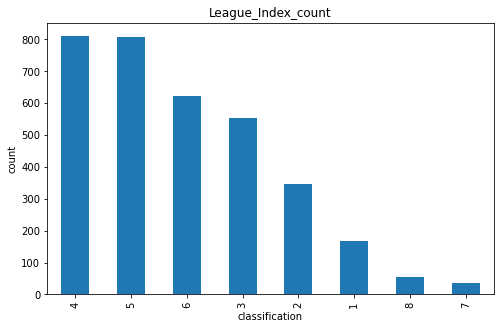

In [22]:
c=g["LeagueIndex"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="classification",
                                     ylabel="count",
                                     title="League_Index_count")
plt.show()

`Bronze - 1` `Silver - 2` `Gold - 3`  `Platinum - 4` `Diamond - 5` `Master - 6` `GrandMaster - 7` `Professional - 8` 

- From graph we can see,

  1.) Very less player belong to 8 and 7 as they both are highest ranking.
  
  2.) Majority of the players are from 4 and followed by 5.
  

## <span style=color:red>Age</span> 

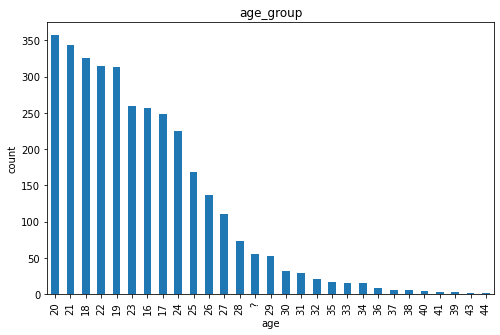

In [23]:
g["Age"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="age",
                                     ylabel="count",
                                     title="age_group")
plt.show()

## - As the graphs shows,
     
     1. It is a numerical data.
     2. There are some missing values in the data as depicted as "?" and their are about 55 in numbers. 
     3. Giving no regards to missing values Players are typically between 16 to 44 years.
     4. Players with age 20 plays the game  more folllwed by 21 and least is 44 years. 

Since our dataset is not very large so we need to fill the blank place by two ways-

1. by mean of column
2. by median of the column

but we cannot fill it by mean So, we will fill it with median because median donot get effected by the fact that how much data is scatter.

In [24]:
g["Age"]=pd.to_numeric(g["Age"],errors="coerce")#converting object into numerical

In [25]:
g["Age"]=g["Age"].fillna(value=g["Age"].median())#filling the missing value

##### let's convert age in to category variable

In [26]:
#Creating a function for converting numerical att. to categorical att.
def age(x):
    if 16<=x<20:
        return "(16,20)"
    elif 20<=x<30:
        return "(20,30)"
    else:
        return "above_30"

In [27]:
g["Age"]=g["Age"].apply(age)

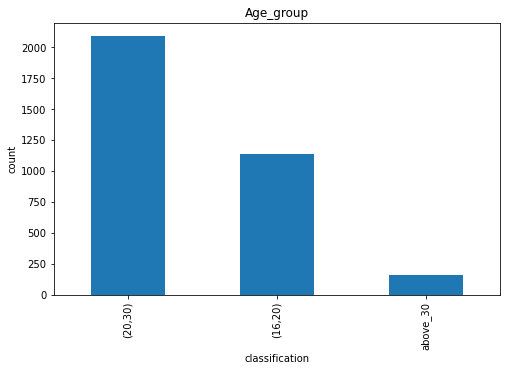

In [28]:
g["Age"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="classification",
                                     ylabel="count",
                                     title="Age_group")
plt.show()

## <span style=color:red>HoursPerWeek</span> 

In [29]:
g["HoursPerWeek"].dtype

dtype('O')

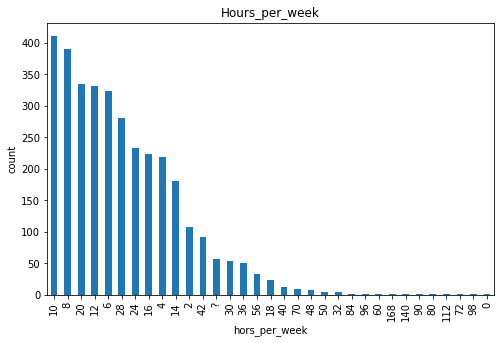

In [30]:
g["HoursPerWeek"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="hors_per_week",
                                     ylabel="count",
                                     title="Hours_per_week")
plt.show()

In [31]:
g["HoursPerWeek"].unique()

array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', '?', '80', '60'],
      dtype=object)

As we can see,
    
    1. It is between 0 to 168 hrs per week after ignoring the missing values.
    2. Mostly players play games 10 hrs per week followed by 8 hrs less players plays abt. 112 hours.
    3. their also 
    3. There are about 56 missing values depicted as "?". 

Since our dataset is not very large so we need to fill the blank place by two ways-

1. by mean of column
2. by median of the column


but we cannot fill it by mean So, we will fill it with median because median donot get effected by the fact that how much data is scatter. But first convert the  **data type of the columns**

In [32]:
g["HoursPerWeek"]=pd.to_numeric(g["HoursPerWeek"], errors='coerce')#converting object data type  to numerical 

In [33]:
g["HoursPerWeek"]=g["HoursPerWeek"].fillna(value=g["HoursPerWeek"].median())#filling the missing value

In [34]:
#Creating a function for converting numerical att. to categorical att.
def hors_Per_week(x):
    if 0<=x<40:
        return "(0,40)"
    else:
        return "40_&_above"

In [35]:
g["HoursPerWeek"]=g["HoursPerWeek"].apply(hors_Per_week)

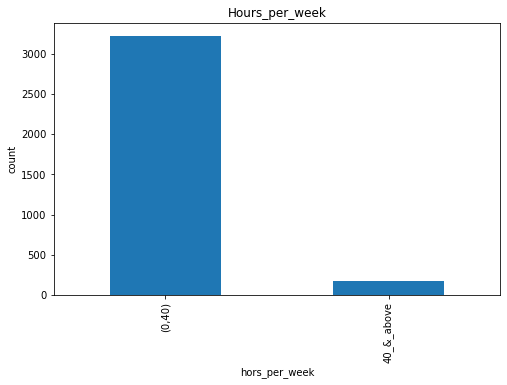

In [36]:
g["HoursPerWeek"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="hors_per_week",
                                     ylabel="count",
                                     title="Hours_per_week")
plt.show()

## <span style=color:red>Total_Hours</span> 

In [37]:
g["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

In [38]:
g["TotalHours"]=pd.to_numeric(g["TotalHours"],errors='coerce')

In [39]:
g["TotalHours"].value_counts()

500.0     328
400.0     213
1000.0    210
300.0     202
600.0     187
         ... 
288.0       1
310.0       1
208.0       1
727.0       1
2671.0      1
Name: TotalHours, Length: 237, dtype: int64

In [40]:
g["TotalHours"].median()

500.0

In [41]:
g["TotalHours"]=g["TotalHours"].fillna(value=g["TotalHours"].median())#filling the missing value

In [42]:
#Creating a function for converting numerical att. to categorical att.
def total_hrs(x):
    if 3<=x<250:
        return "(0,250)"
    elif  250<=x<500:
        return "(250,500)"
    elif  500<=x<1000:
        return "(500,1000)"
    else:
        return "(above_1000)"

In [43]:
g["TotalHours"]=g["TotalHours"].apply(total_hrs)

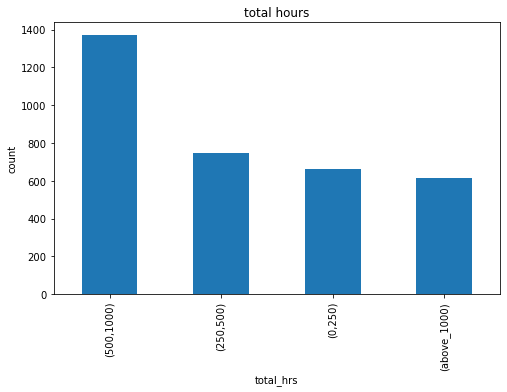

In [44]:
g["TotalHours"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="total_hrs",
                                     ylabel="count",
                                     title="total hours")
plt.show()

**Here we converted the time related numerical variables into categorical variables because,**

- Mostly  player play acc. to what time they have some players play less some play in between and some play at excess level      keeping all the factors in mind we converted them into categorical to manage the upper side outliers as well as the lower side outliers.

## <span style=color:red>APM:Action per minute</span> 

In [45]:
g["APM"].dtypes# dtype of the respective att.

dtype('float64')

In [46]:
g["APM"].count()

3395

In [47]:
g["APM"].nunique()

3374

it is numerical variable  with no missing values and 3374 unique value

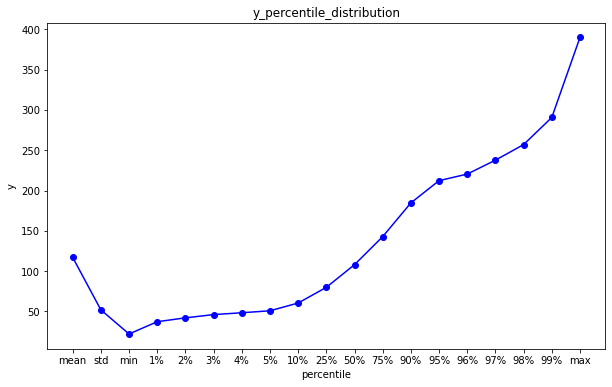

In [48]:
y=g["APM"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="blue", marker="o")
plt.xlabel("percentile")
plt.ylabel("y")
plt.title("y_percentile_distribution")
plt.show()

1. Since standard deviation is less than mean their will be less outliers in this data

2. As the graphs shows outlier are mostly on the upper side and from graphs we can say that outliers starts after 97 percentile


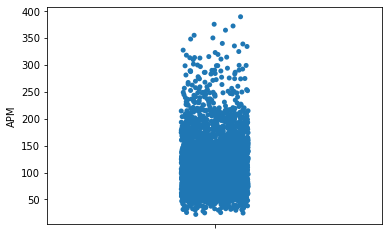

In [49]:
sns.stripplot(y=g["APM"])
plt.show()

Most of the values are between **30 to 250** approximately so for knowing about outliers 

let's move further,

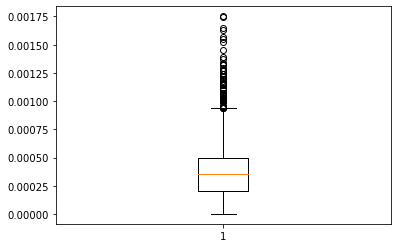

In [50]:
plt.boxplot(g["AssignToHotkeys"])#outliers detection from which exact point
plt.show()

From **Boxplot**,

we can say that outliers starts in between 200 to 250 


## <span style=color:red>Assign_To_Hotkeys</span> 

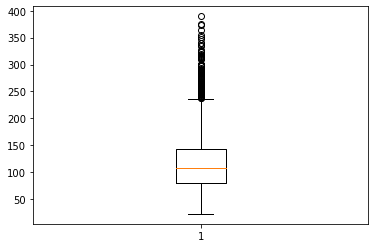

In [51]:
plt.boxplot(g["APM"])
plt.show()

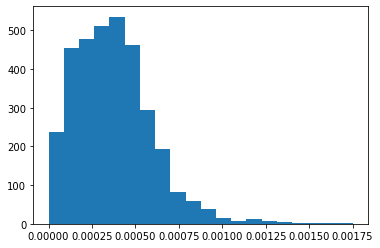

In [52]:
plt.hist(g["AssignToHotkeys"],bins=20)
plt.show()

As we can see in this,

1. Frequency distribution is asymmetric.

2. It is a right skewed data which mean is greater than median.


In [53]:
#c=g["AssignToHotkeys"].mean()
#m=g["AssignToHotkeys"].median()
#if c>m:
    #print("mean is greater than median")
#else:
    #print("median is greater than mean ")

In [54]:
g["AssignToHotkeys"].describe()

count    3395.000000
mean        0.000374
std         0.000225
min         0.000000
25%         0.000204
50%         0.000353
75%         0.000499
max         0.001752
Name: AssignToHotkeys, dtype: float64

The above data is in range between 0 to .001752.

Here mean is greater than standard deviation but the diff. is not much.

for outliers let's move further,

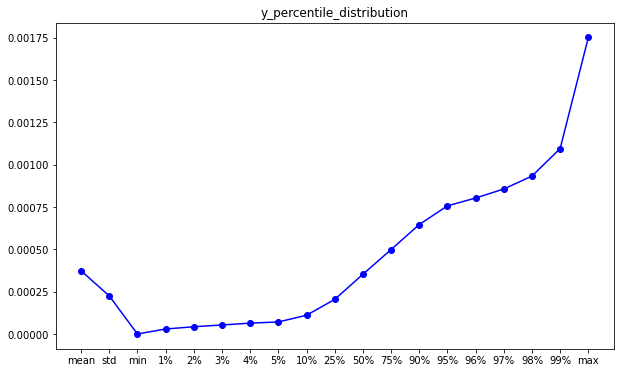

In [55]:
y=g["AssignToHotkeys"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="blue", marker="o")
plt.title("y_percentile_distribution")
plt.show()


As depicted in graph,

1. Their is gradual increase after each percentile.

2. But after 98 percentile the change is rapid.

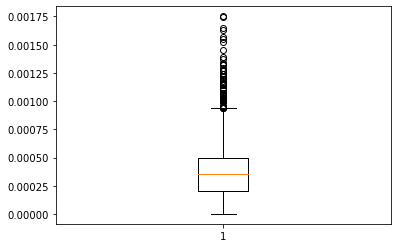

In [56]:
plt.boxplot(g["AssignToHotkeys"])#outliers detection from which exact point
plt.show()

From box plot we can say that,

1. outliers starts after .00075 

2. After 75% percentile the tail is larger compared to before 25 percentile as shown in above histogram

## <span style=color:red>UniqueHotkeys</span> 

In [57]:
g["UniqueHotkeys"].dtypes

dtype('int64')

 It's datatype is **int** it means no decimal values.

In [58]:
g["UniqueHotkeys"].describe()

count    3395.000000
mean        4.364654
std         2.360333
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: UniqueHotkeys, dtype: float64

1. Their is no missing value .

2. Starts from 0 and end with 10.


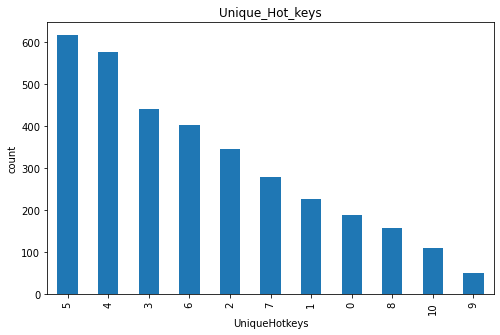

In [59]:
g["UniqueHotkeys"].value_counts().plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="UniqueHotkeys",
                                     ylabel="count",
                                     title="Unique_Hot_keys")
plt.show()   

1. Majority players able to use 5 hot keys per time stamp followed by 4 

2. least is 9.

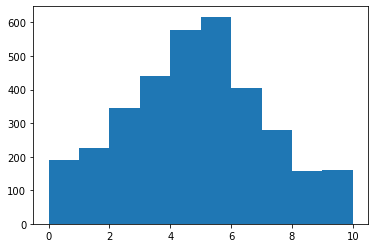

In [60]:
plt.hist(g["UniqueHotkeys"],bins=10)
plt.show()

This above histogram is nearly normally distributed.
Which means mean and median are **nearly equal** (*not exact equal*)

In [61]:
#c=g["UniqueHotkeys"].mean()
#m=g["UniqueHotkeys"].median()
#if c>m:
    #print("mean is greater than median")
#else:
    #print("median is greater than mean")

#print(c)
#print(m)

###### Their is no need of further invtigation in this att.

## <span style=color:red>Minimap_Attack</span> 

In [62]:
g["MinimapAttacks"].dtypes

dtype('float64')

In [63]:
g["MinimapAttacks"].describe()

count    3395.000000
mean        0.000098
std         0.000166
min         0.000000
25%         0.000000
50%         0.000040
75%         0.000119
max         0.003019
Name: MinimapAttacks, dtype: float64

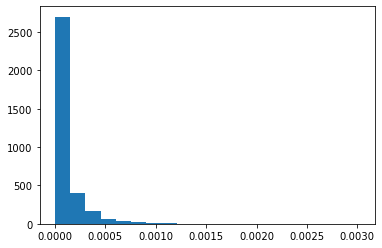

In [64]:
plt.hist(g["MinimapAttacks"],bins=20)
plt.show()

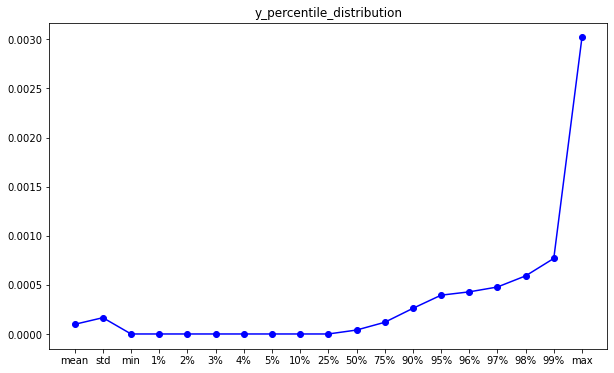

In [65]:
y=g["MinimapAttacks"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="blue", marker="o")
plt.title("y_percentile_distribution")
plt.show()

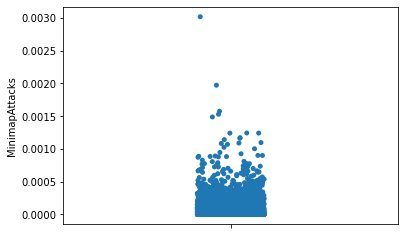

In [66]:
sns.stripplot(y=g["MinimapAttacks"])
plt.show()

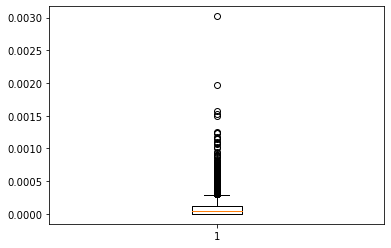

In [67]:
plt.boxplot(g["MinimapAttacks"])
plt.show()

In [68]:
#g["MinimapAttacks"]=np.where(g["MinimapAttacks"]>.00028,.00028,g["MinimapAttacks"])

In [69]:
#plt.boxplot(g["MinimapAttacks"])
#plt.show()

## <span style=color:#18C6A4>Minimap_Right_Clicks</span> 

In [70]:
g["MinimapRightClicks"].nunique()

3302

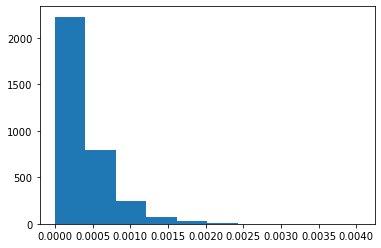

In [71]:
plt.hist(g["MinimapRightClicks"])
plt.show()


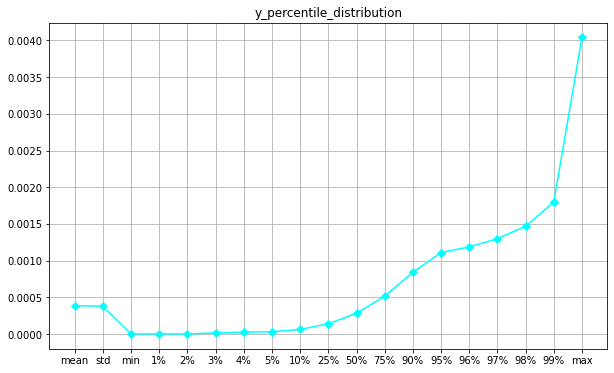

In [72]:
y=g["MinimapRightClicks"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()

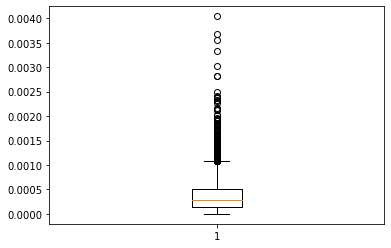

In [73]:
plt.boxplot(g["MinimapRightClicks"])
plt.show()

In [74]:
#g["MinimapRightClicks"]=np.where(g["MinimapRightClicks"]>.0010,.0010,g["MinimapRightClicks"])

In [75]:
#plt.boxplot(g["MinimapRightClicks"])
#plt.show()

## <span style=color:#80BB80>Number_Of_PACs</span> 


C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


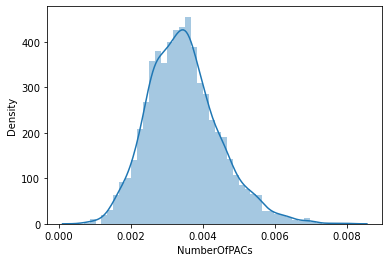

In [76]:
sns.distplot(g["NumberOfPACs"]) 
plt.show()

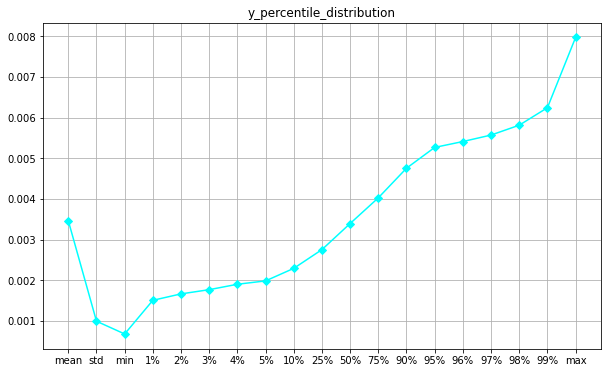

In [77]:
y=g["NumberOfPACs"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y) 
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1) 
x.drop(labels=[0],axis=0,inplace=True) 
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6)) 
plt.plot(x["variables"], x["y"],color="cyan", marker="D") 
plt.grid() 
plt.title("y_percentile_distribution") 
plt.show()

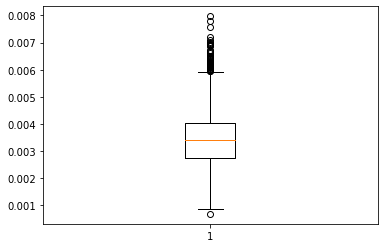

In [78]:
plt.boxplot(g["NumberOfPACs"])
plt.show()

## <span style=color:#F2A707>Gap_Between_PACs</span> 

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


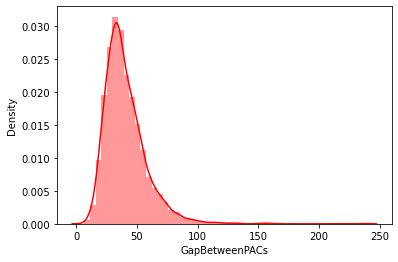

In [79]:
sns.distplot(g["GapBetweenPACs"],color="red")
plt.show()

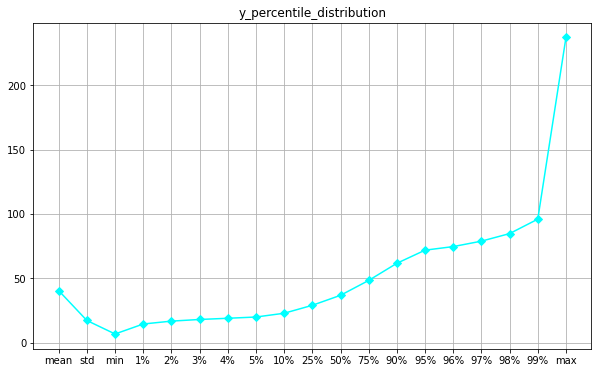

In [80]:
y=g["GapBetweenPACs"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()


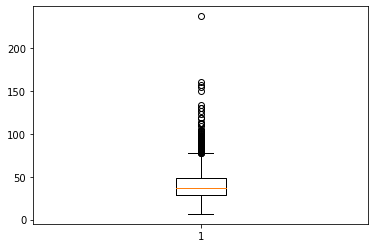

In [81]:
plt.boxplot(g["GapBetweenPACs"])
plt.show()

In [82]:
#g["GapBetweenPACs"]=np.where(g["GapBetweenPACs"]>75,75,g["GapBetweenPACs"])

In [83]:
#plt.boxplot(g["GapBetweenPACs"])
#plt.show()

## <span style=color:#F4C430>Action_Latency</span>



In [84]:
g["ActionLatency"].value_counts()

64.6667    2
46.2667    2
90.3333    2
58.4358    2
72.0000    2
          ..
97.9259    1
42.3583    1
56.9693    1
94.8639    1
65.8978    1
Name: ActionLatency, Length: 3367, dtype: int64

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


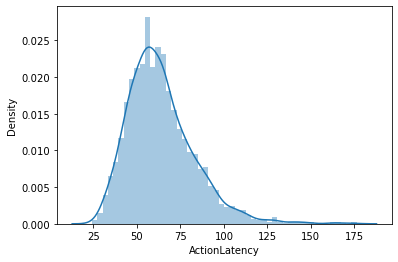

In [85]:
sns.distplot(g["ActionLatency"])
plt.show()

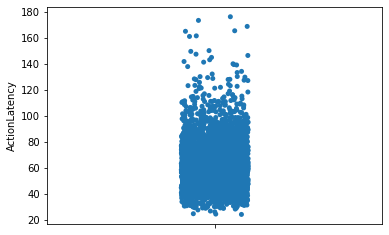

In [86]:
sns.stripplot(y=g["ActionLatency"])
plt.show()

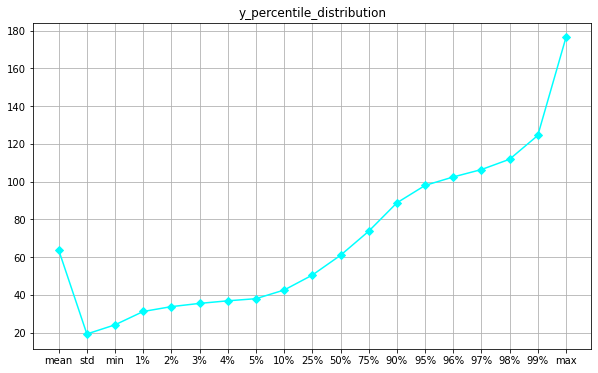

In [87]:
y=g["ActionLatency"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()


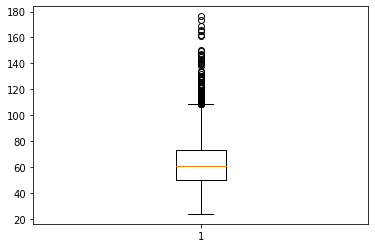

In [88]:
plt.boxplot(g["ActionLatency"])
plt.show()

In [89]:
#g["ActionLatency"]=np.where(g["ActionLatency"]>105,105,g["ActionLatency"])

In [90]:
#plt.boxplot(g["ActionLatency"])
#plt.show()

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


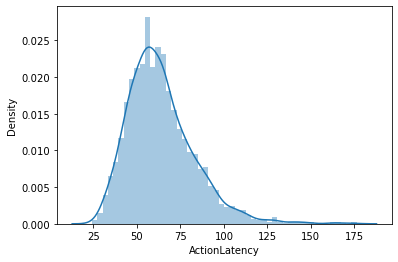

In [91]:
sns.distplot(g["ActionLatency"])
plt.show()

## <span style=color:#ACEA75>Actions_In_PAC</span>

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


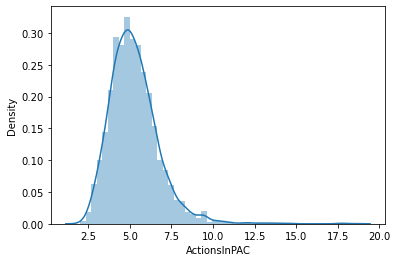

In [92]:
sns.distplot(g["ActionsInPAC"])
plt.show()


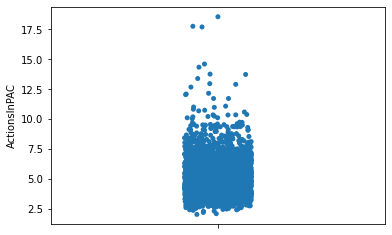

In [93]:
sns.stripplot(y=g["ActionsInPAC"])
plt.show()

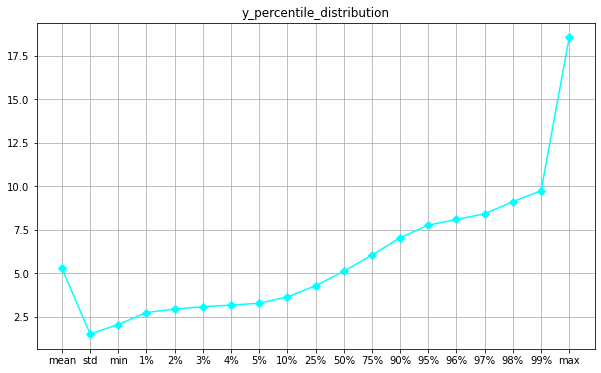

In [94]:
y=g["ActionsInPAC"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()

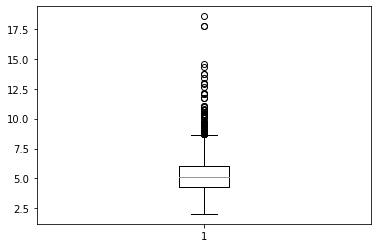

In [95]:
plt.boxplot(g["ActionsInPAC"])
plt.show()

In [96]:
#g["ActionsInPAC"]=np.where(g["ActionsInPAC"]>7.030980,7.030980,g["ActionsInPAC"])

In [97]:
#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_subplot(111)
#
#bp = ax.boxplot(g["ActionsInPAC"], patch_artist = True,
                 #vert = 0)


## <span style=color:#ACEA75>Actions_In_PAC</span>

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


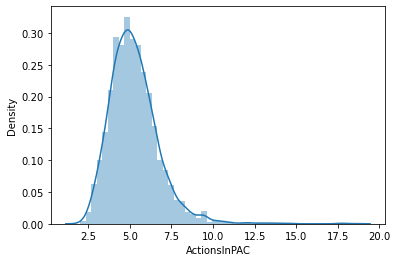

In [98]:
sns.distplot(g["ActionsInPAC"])
plt.show()

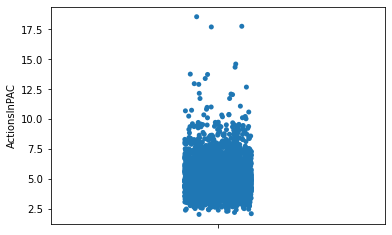

In [99]:
sns.stripplot(y=g["ActionsInPAC"])
plt.show()

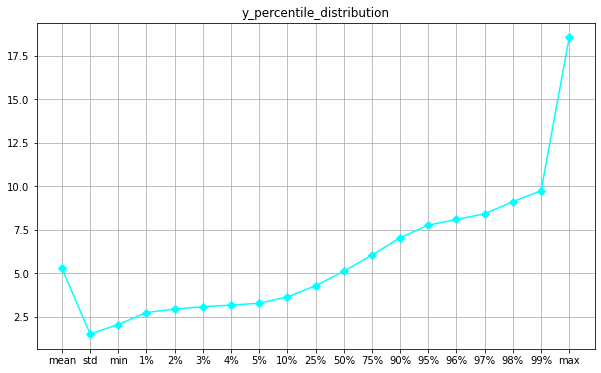

In [100]:
y=g["ActionsInPAC"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()

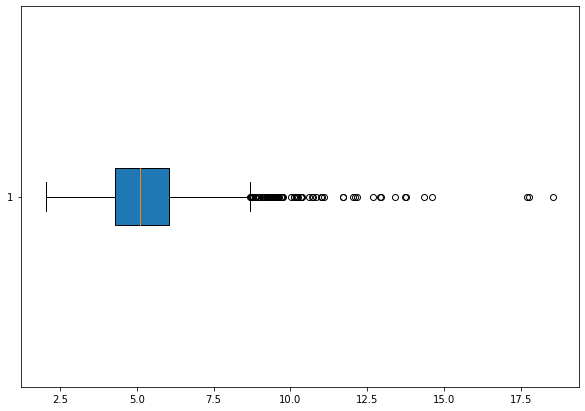

In [101]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(g["ActionsInPAC"], patch_artist = True,
                 vert = 0)


In [102]:
#g["ActionsInPAC"]=np.where(g["ActionsInPAC"]>7.030980,7.030980,g["ActionsInPAC"])


In [103]:
#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_subplot(111)

#bp = ax.boxplot(g["ActionsInPAC"], patch_artist = True,
                 #vert = 0)


## <span style=color:#C0E12B>Total_Map_Explored</span>



C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


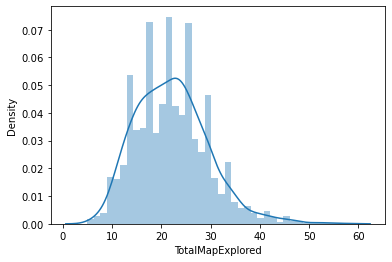

In [104]:
sns.distplot(g["TotalMapExplored"])
plt.show()

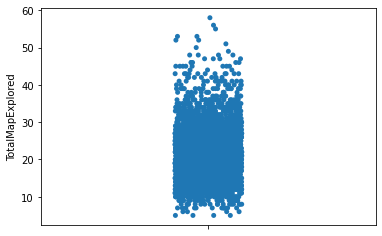

In [105]:
sns.stripplot(y=g["TotalMapExplored"])
plt.show()


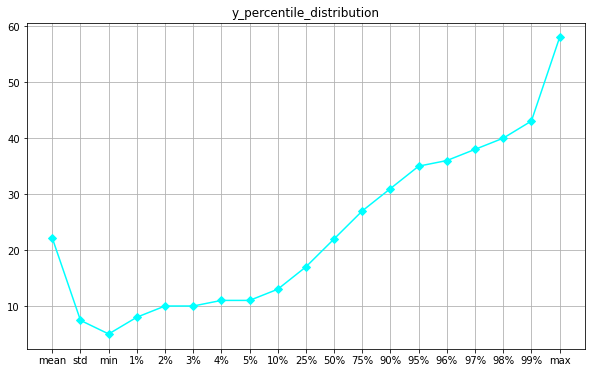

In [106]:
y=g["TotalMapExplored"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()

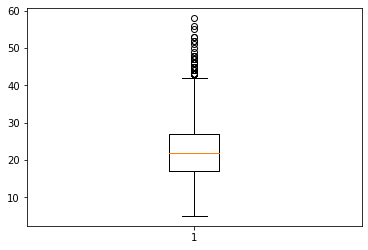

In [107]:
plt.boxplot(g["TotalMapExplored"])
plt.show()

In [108]:
g["TotalMapExplored"]=np.where(g["TotalMapExplored"]>42,42,g["TotalMapExplored"])

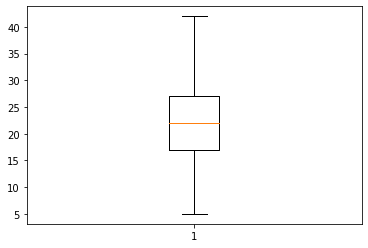

In [109]:
plt.boxplot(g["TotalMapExplored"])
plt.show()

## <span style=color:#7DD2C5>Workers_Made</span>

In [110]:
g["WorkersMade"].value_counts()

0.001134    4
0.001029    3
0.001015    3
0.001159    3
0.001020    3
           ..
0.001169    1
0.001274    1
0.000824    1
0.002257    1
0.000750    1
Name: WorkersMade, Length: 3256, dtype: int64

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


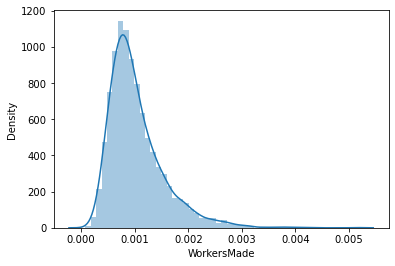

In [111]:
sns.distplot(g["WorkersMade"])
plt.show()

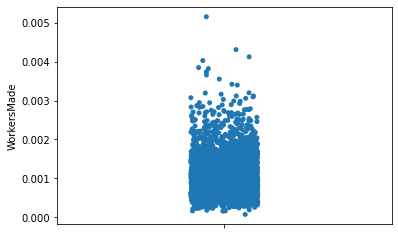

In [112]:
sns.stripplot(y=g["WorkersMade"])
plt.show()

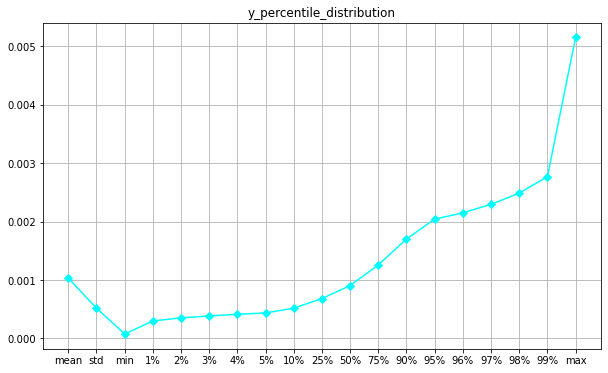

In [113]:
y=g["WorkersMade"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()

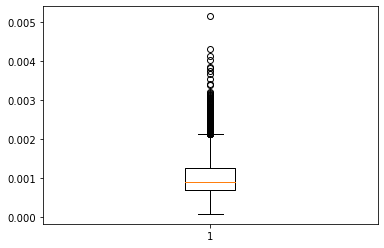

In [114]:
plt.boxplot(g["WorkersMade"])
plt.show()

In [115]:
#g["WorkersMade"]=np.where(g["WorkersMade"]>0.001701,0.001701,g["WorkersMade"])

In [116]:
#plt.boxplot(g["WorkersMade"])
#plt.show()

## <span style=color:#970C7E>Unique_Units_Made</span>

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


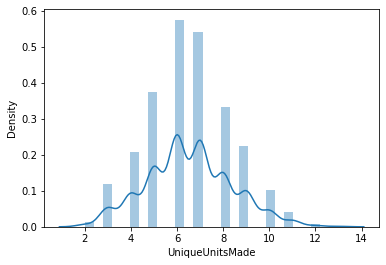

In [117]:
sns.distplot(g["UniqueUnitsMade"])
plt.show()

In [118]:
g["UniqueUnitsMade"].value_counts()

6     768
7     721
5     499
8     446
9     299
4     277
3     160
10    137
11     54
2      19
12     11
13      4
Name: UniqueUnitsMade, dtype: int64

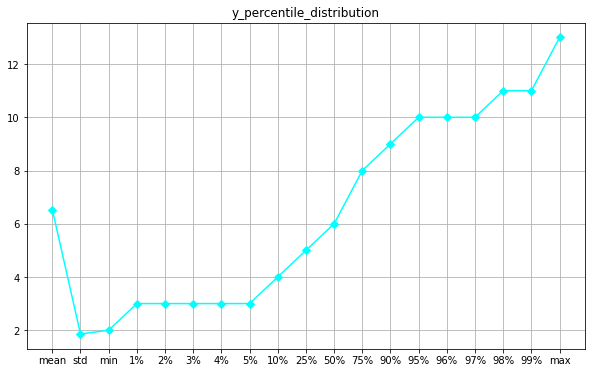

In [119]:
y=g["UniqueUnitsMade"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()


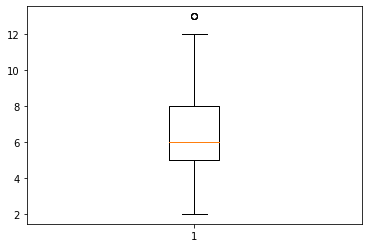

In [120]:
plt.boxplot(g["UniqueUnitsMade"])
plt.show()

## <span style=color:#9392CA>Complex_Units_Made</span>

In [121]:
g["ComplexUnitsMade"].dtypes

dtype('float64')

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


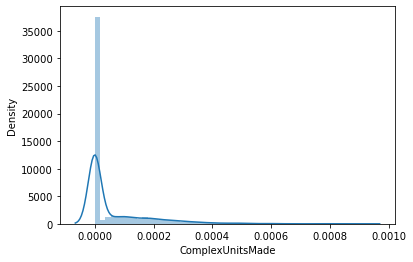

In [122]:
sns.distplot(g["ComplexUnitsMade"])
plt.show()

In [123]:
g["ComplexUnitsMade"].value_counts()

0.000000    2281
0.000045       2
0.000154       2
0.000257       2
0.000047       2
            ... 
0.000149       1
0.000102       1
0.000543       1
0.000273       1
0.000117       1
Name: ComplexUnitsMade, Length: 1110, dtype: int64

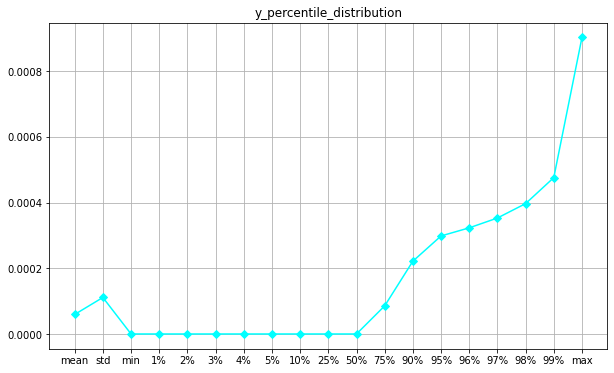

In [124]:
y=g["ComplexUnitsMade"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99])
x=pd.DataFrame(y)
x.reset_index(inplace=True)
x.set_axis(['variables', 'y'],inplace=True,axis=1)
x.drop(labels=[0],axis=0,inplace=True)
x.reset_index(inplace=True)
x.drop(columns=["index"],inplace=True)
plt.figure(figsize=(10,6))
plt.plot(x["variables"], x["y"],color="cyan", marker="D")
plt.grid()
plt.title("y_percentile_distribution")
plt.show()


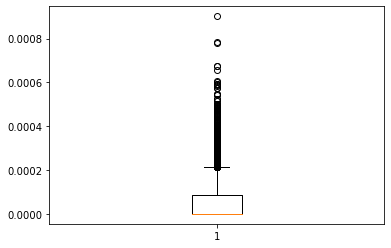

In [125]:
plt.boxplot(g["ComplexUnitsMade"])
plt.show()


In [126]:
#g["ComplexUnitsMade"]=np.where(g["ComplexUnitsMade"]>0.0002,0.0002,g["ComplexUnitsMade"])

In [127]:
#plt.boxplot(g["ComplexUnitsMade"])
#plt.show()

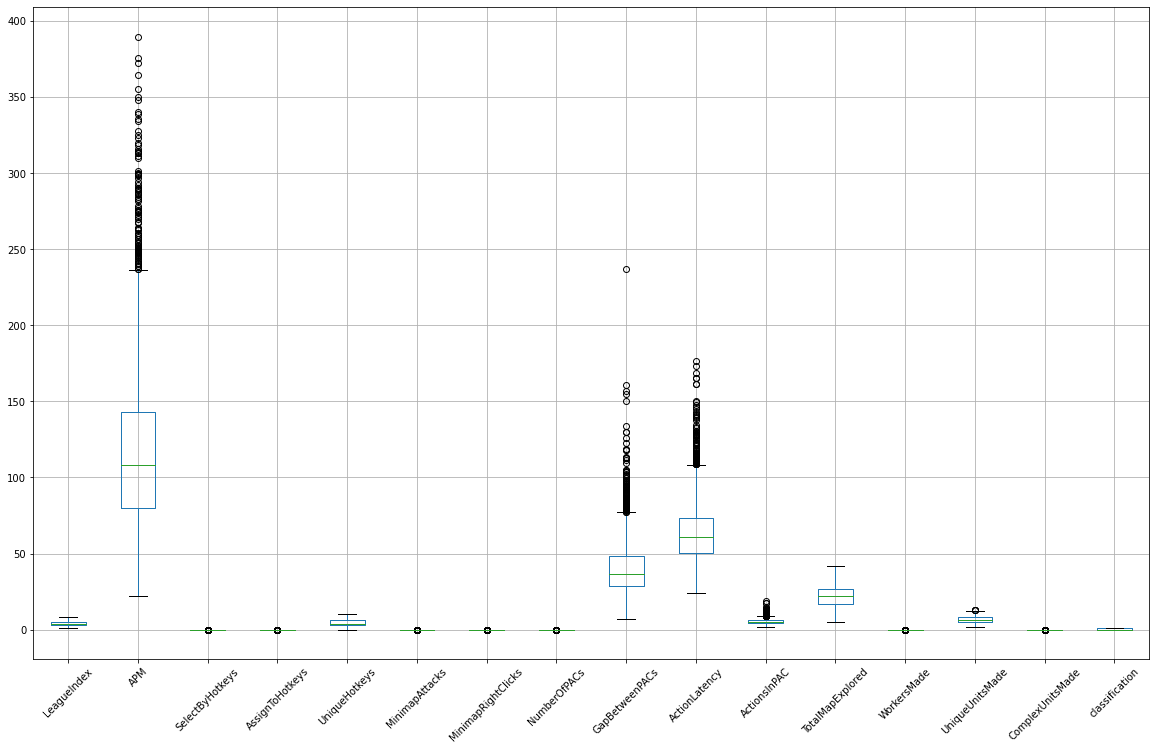

In [128]:
g.boxplot(figsize=(20,12))
plt.xticks(rotation=45)
plt.show()



## BI-VARIATE ANALYSIS

In [129]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 52 to 10095
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         3395 non-null   int64  
 1   Age                 3395 non-null   object 
 2   HoursPerWeek        3395 non-null   object 
 3   TotalHours          3395 non-null   object 
 4   APM                 3395 non-null   float64
 5   SelectByHotkeys     3395 non-null   float64
 6   AssignToHotkeys     3395 non-null   float64
 7   UniqueHotkeys       3395 non-null   int64  
 8   MinimapAttacks      3395 non-null   float64
 9   MinimapRightClicks  3395 non-null   float64
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   float64
 12  ActionLatency       3395 non-null   float64
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   int64  
 15  WorkersMade         3395 non-null   float64
 16  Uniq

## LeagueIndex

### With object data type

In [130]:
g[["LeagueIndex","Age"]][:]

LeagueIndex       Age
GameID                       
52                5   (20,30)
55                5   (20,30)
56                4  above_30
57                3   (16,20)
58                3  above_30
...             ...       ...
10089             8   (20,30)
10090             8   (20,30)
10092             8   (20,30)
10094             8   (20,30)
10095             8   (20,30)

[3395 rows x 2 columns]

<Figure size 3600x1800 with 0 Axes>

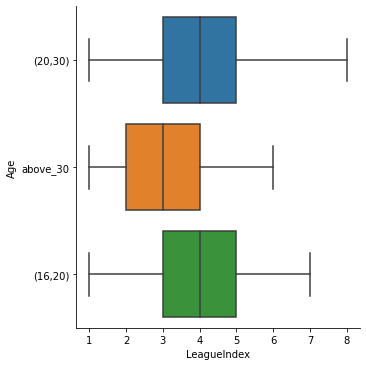

In [131]:
plt.figure(figsize=(50,25))
sns.catplot(x="LeagueIndex", y="Age", kind="box", data=g)
plt.show()

### Chi_square Test
- Ho: There is no relationship between LeagueIndex & Age
- Ha: There is relationship/associativity between LeagueIndex & Age


In [132]:
p=pd.crosstab(g["LeagueIndex"],g["Age"])

In [133]:
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between LeagueIndex & Age")
print("Ha: There is relationship/associativity between LeagueIndex & Age")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between LeagueIndex and Age".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between LeagueIndex and Age".format(pvalue))


Ho: There is no relationship between LeagueIndex & Age
Ha: There is relationship/associativity between LeagueIndex & Age
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 6.936637636921412e-23 which is very low.i.e,There is a significant Relationship between LeagueIndex and Age


<Figure size 1440x1440 with 0 Axes>

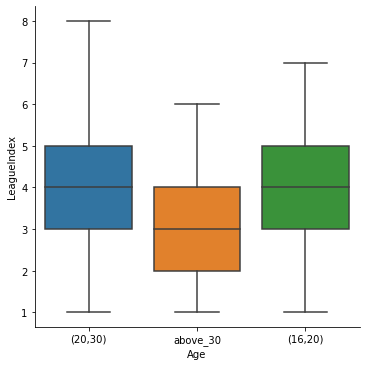

In [134]:
plt.figure(figsize=(20,20))
sns.catplot(x="Age", y="LeagueIndex", kind="box", data=g)

In [135]:
g[["LeagueIndex","HoursPerWeek"]][:]

LeagueIndex HoursPerWeek
GameID                          
52                5       (0,40)
55                5       (0,40)
56                4       (0,40)
57                3       (0,40)
58                3       (0,40)
...             ...          ...
10089             8       (0,40)
10090             8       (0,40)
10092             8       (0,40)
10094             8       (0,40)
10095             8       (0,40)

[3395 rows x 2 columns]

<Figure size 3600x1800 with 0 Axes>

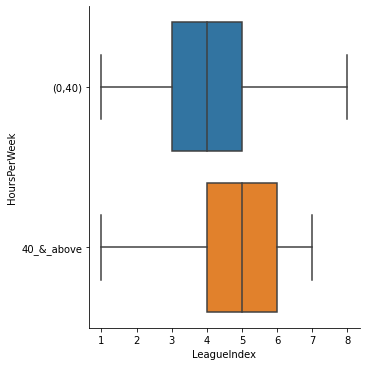

In [136]:
plt.figure(figsize=(50,25))
sns.catplot(x="LeagueIndex", y="HoursPerWeek", kind="box", data=g) 

In [137]:
p=pd.crosstab(g["LeagueIndex"],g["HoursPerWeek"])
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)
print("Ho: There is no relationship between LeagueIndex & HoursPerWeek")
print("Ha: There is relationship/associativity between LeagueIndex & HoursPerWeek")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relat--ionship between LeagueIndex and HoursPerWeek".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between LeagueIndex and HoursPerWeek".format(pvalue))


Ho: There is no relationship between LeagueIndex & HoursPerWeek
Ha: There is relationship/associativity between LeagueIndex & HoursPerWeek
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.1351018358469959e-24 which is very low.i.e,There is a significant Relat--ionship between LeagueIndex and HoursPerWeek


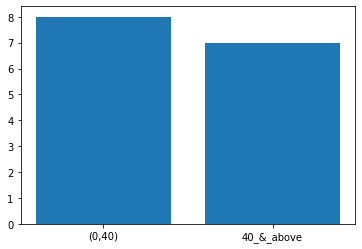

In [138]:
plt.bar(g["HoursPerWeek"],g["LeagueIndex"])
plt.show()

### With numerical data types

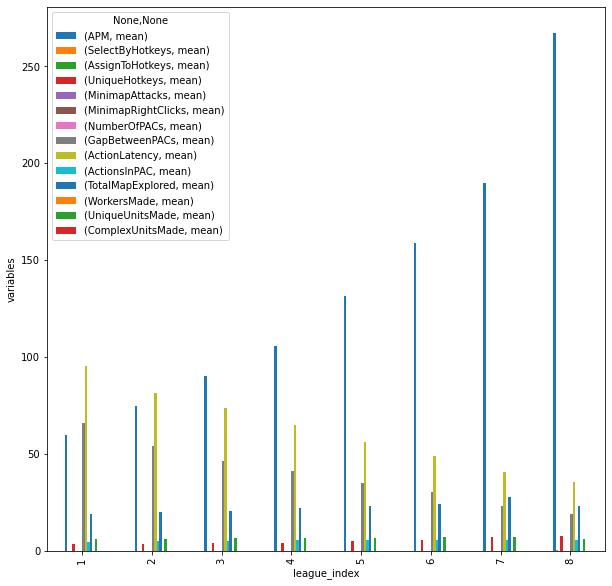

In [139]:
g.groupby(["LeagueIndex"]).agg({'APM':["mean"],
       'SelectByHotkeys':["mean"], 'AssignToHotkeys':["mean"], 'UniqueHotkeys':["mean"], 'MinimapAttacks':["mean"],
       'MinimapRightClicks':["mean"], 'NumberOfPACs':["mean"], 'GapBetweenPACs':["mean"], 'ActionLatency':["mean"],
       'ActionsInPAC':["mean"], 'TotalMapExplored':["mean"], 'WorkersMade':["mean"], 'UniqueUnitsMade':["mean"],
       'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="variables")
plt.show()


### `APM`

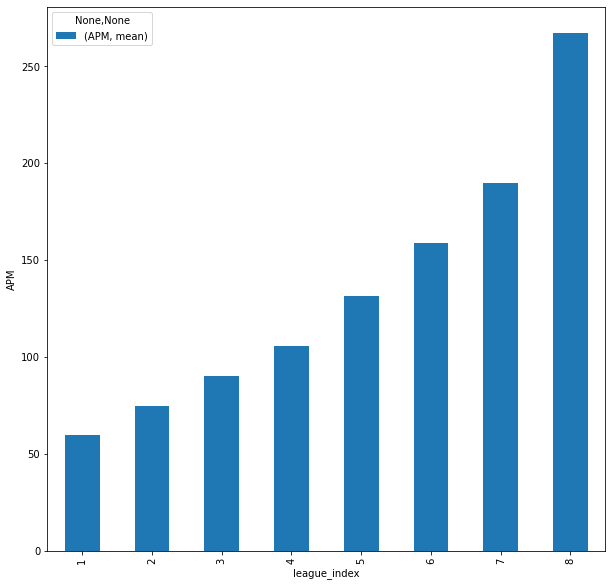

In [140]:
g.groupby(["LeagueIndex"]).agg({'APM':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="APM")
plt.show()


**League index is directly prortional to APM (Action per minute)**

### `UniqueHotkeys`

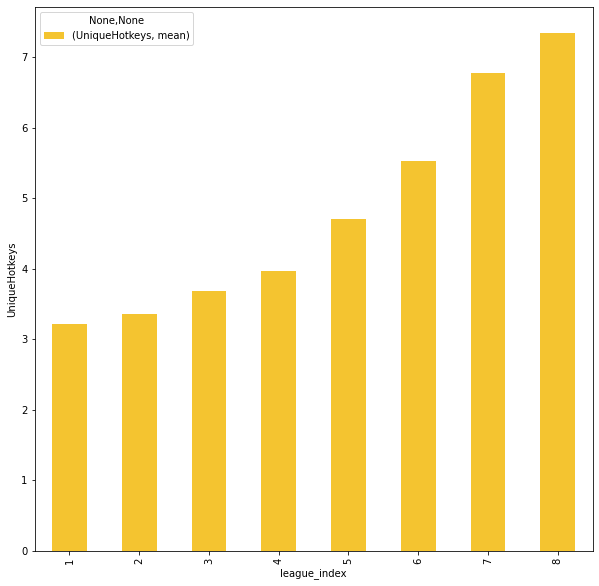

In [141]:
g.groupby(["LeagueIndex"]).agg({'UniqueHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="UniqueHotkeys",color="#F4C430")
plt.show()


`UniqueHotkeys` is showing a positive relation with `League Index`

### `AssignToHotkeys`

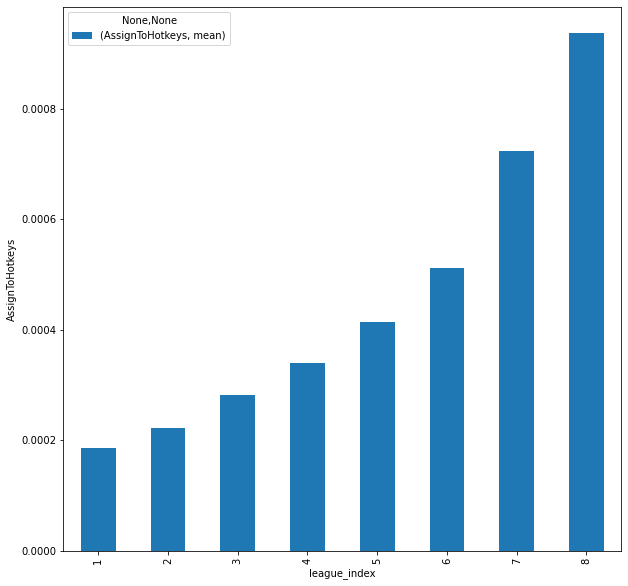

In [142]:
g.groupby(["LeagueIndex"]).agg({'AssignToHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="AssignToHotkeys")
plt.show()


 `AssignToHotkeys` is showing a positive relation with `League Index`

### `SelectByHotkeys`

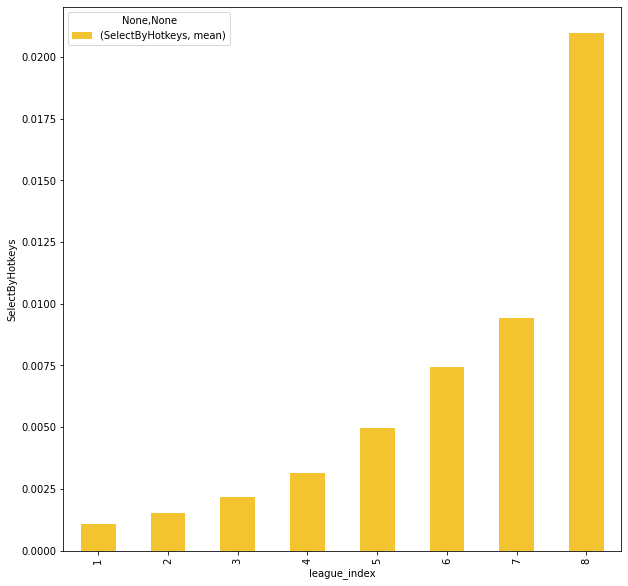

In [143]:
g.groupby(["LeagueIndex"]).agg({'SelectByHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="SelectByHotkeys",color="#F4C430")
plt.show()

`SelectByHotkeys` is showing a positive relation with `League Index`

Thier is a gradual change  upto league 7 but after that change is sky high 

### `MinimapAttacks`

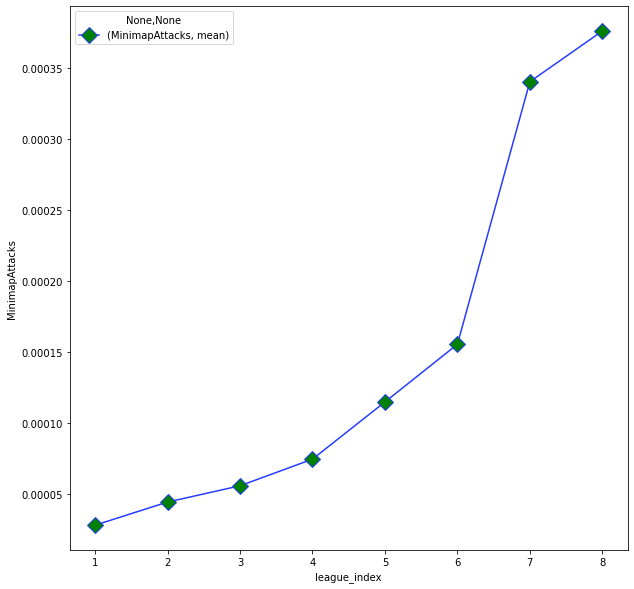

In [144]:
g.groupby(["LeagueIndex"]).agg({'MinimapAttacks':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="MinimapAttacks",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


 `MinimapAttacks` is showing a positive relation with `League Index`
 
 From league 1 to 6 the relation is gradual but from 6 to 7 their is a big diff after that .

### `NumberOfPACs`

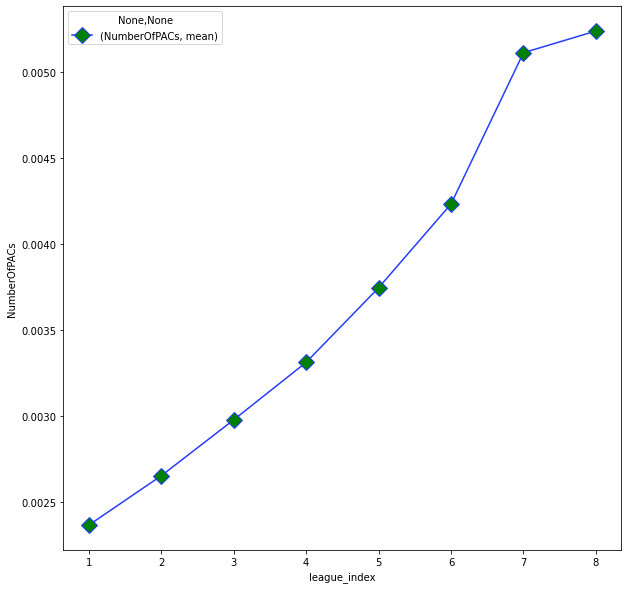

In [145]:
g.groupby(["LeagueIndex"]).agg({'NumberOfPACs':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="NumberOfPACs",color="#253bff",
                                     marker="D", markerfacecolor='green', markersize=12)
plt.show()


`NumberOfPACs` positive relation with `LeagueIndex`

League 7 and 8 pocess nearly equal NumberOfPACs

### `GapBetweenPACs`

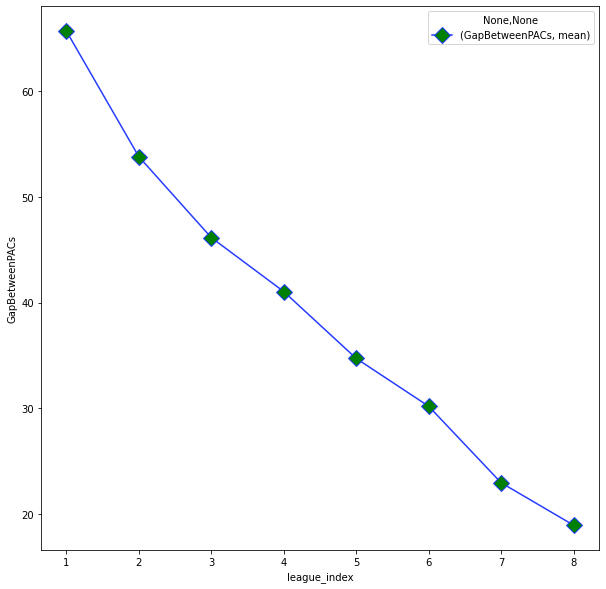

In [146]:
g.groupby(["LeagueIndex"]).agg({'GapBetweenPACs':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="GapBetweenPACs",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


`GapBetweenPACs` and  `LeagueIndex` are in negative relation 

### `ActionLatency`

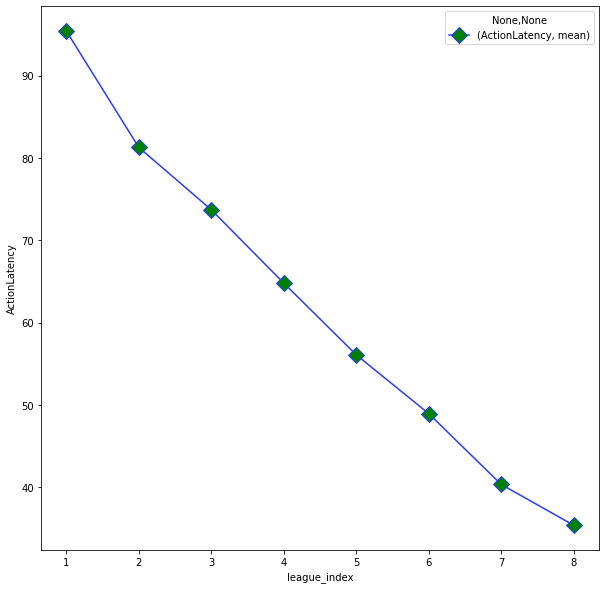

In [147]:
g.groupby(["LeagueIndex"]).agg({'ActionLatency':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="ActionLatency",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


`ActionLatency` and  `LeagueIndex` are in negative relation 

### `ActionsInPAC`

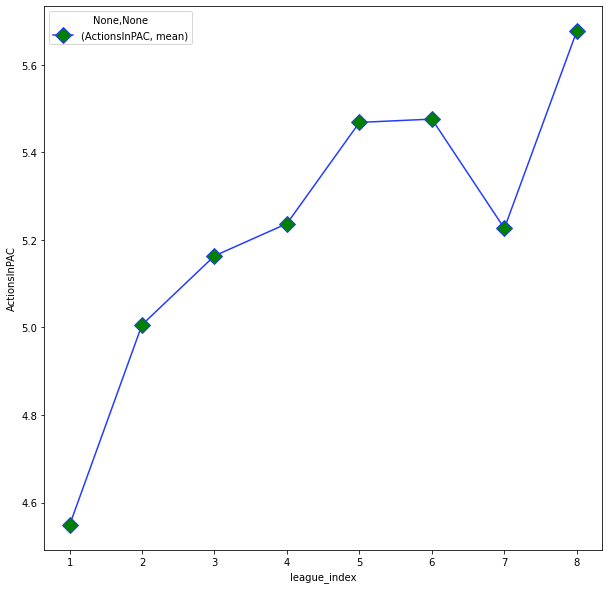

In [148]:
g.groupby(["LeagueIndex"]).agg({'ActionsInPAC':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="ActionsInPAC",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


Although the relation between `ActionsInPAC` and `ActionsInPAC`is positive but not quite simple 

Change is uneven 

### `TotalMapExplored`

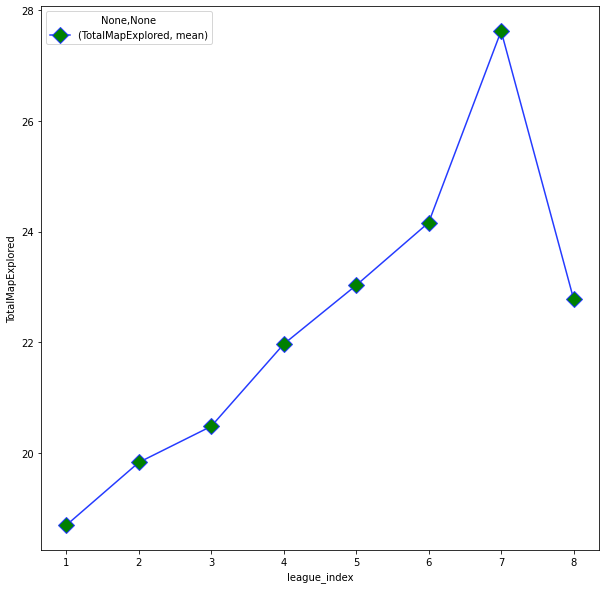

In [149]:
g.groupby(["LeagueIndex"]).agg({'TotalMapExplored':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="TotalMapExplored",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


From here we can see that,

Each player of league explored different amount of map ,but the relation is positive overall

Player in highest league (8) explored only that region which helps the player to compeletes the goals

Player of  highest league (8) explored even less than the player in **league 5**


### `WorkersMade`

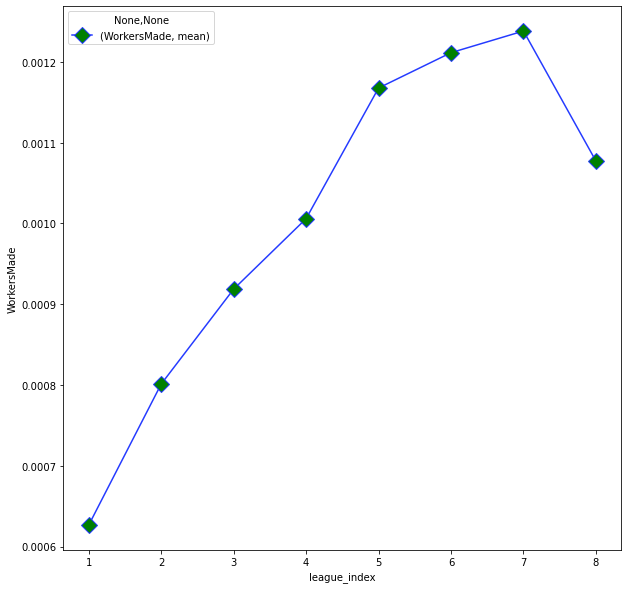

In [150]:
g.groupby(["LeagueIndex"]).agg({'WorkersMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="WorkersMade",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


Relation is not quiet simple Although it is positive
 

### `UniqueUnitsMade`

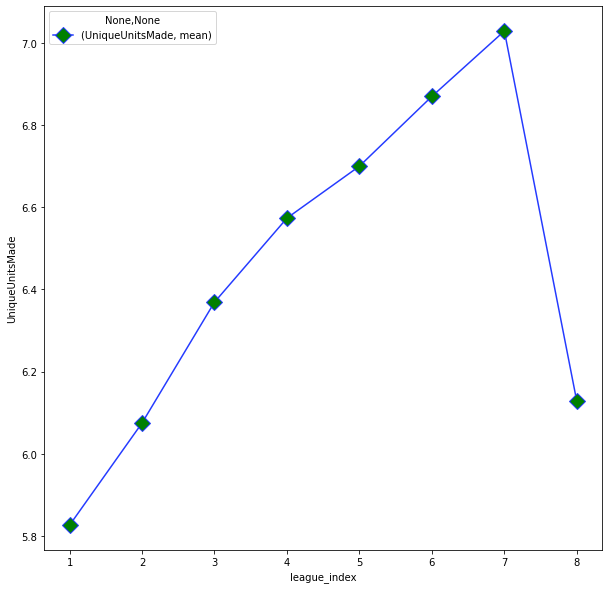

In [151]:
g.groupby(["LeagueIndex"]).agg({'UniqueUnitsMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="UniqueUnitsMade",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()


### `ComplexUnitsMade`

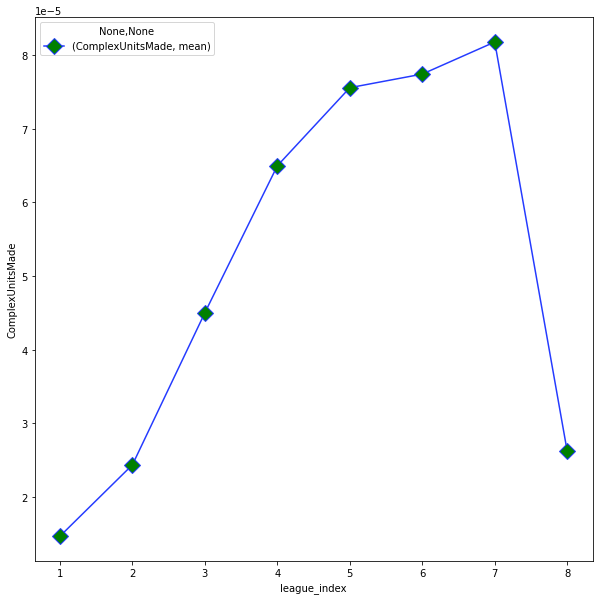

In [152]:
g.groupby(["LeagueIndex"]).agg({'ComplexUnitsMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="league_index",
                                     ylabel="ComplexUnitsMade",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()

### Classification

`The league index and Classification are categorical so we need to use hypothesis test` 

### Chi_square Test
- Ho: There is no relationship between LeagueIndex & classification
- Ha: There is relationship/associativity between LeagueIndex & classification


In [153]:
p=pd.crosstab(g["LeagueIndex"],g["classification"])

In [154]:
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between LeagueIndex & classification")
print("Ha: There is relationship/associativity between LeagueIndex & classification")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between LeagueIndex and classification".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between LeagueIndex and classification".format(pvalue))


Ho: There is no relationship between LeagueIndex & classification
Ha: There is relationship/associativity between LeagueIndex & classification
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 6.217368083226553e-14 which is very low.i.e,There is a significant Relationship between LeagueIndex and classification


***

From above visualization we can say that `League index` tells lot of about the data. We can easily tell about a player by just knowing his league index .

***
***

Some variables `ComplexUnitsMade` ,`UniqueUnitsMade`,`WorkersMade`,`TotalMapExplored`, and`ActionsInPAC` give some variations.


***

## Age

In [155]:
#g.info()

### With object dtypes

In [156]:
#g.columns

### `HoursPerWeek`

### Chi_square Test
- Ho: There is no relationship between Age & HoursPerWeek
- Ha: There is relationship/associativity between Age & HoursPerWeek


In [157]:
p=pd.crosstab(g["Age"],g["HoursPerWeek"])
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between HoursPerWeek & Age")
print("Ha: There is relationship/associativity between HoursPerWeek & Age")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and Age".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and Age".format(pvalue))


Ho: There is no relationship between HoursPerWeek & Age
Ha: There is relationship/associativity between HoursPerWeek & Age
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 2.0896668447822007e-06 which is very low.i.e,There is a significant Relationship between HoursPerWeek and Age


### `TotalHours`

### Chi_square Test
- Ho: There is no relationship between Age & TotalHours
- Ha: There is relationship/associativity between Age & TotalHours


In [158]:
p=pd.crosstab(g["Age"],g["TotalHours"])
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between TotalHours & Age")
print("Ha: There is relationship/associativity between TotalHours & Age")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and Age".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and Age".format(pvalue))


Ho: There is no relationship between TotalHours & Age
Ha: There is relationship/associativity between TotalHours & Age
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.026759686930715013 which is very low.i.e,There is a significant Relationship between TotalHours and Age


### With numerical dtypes

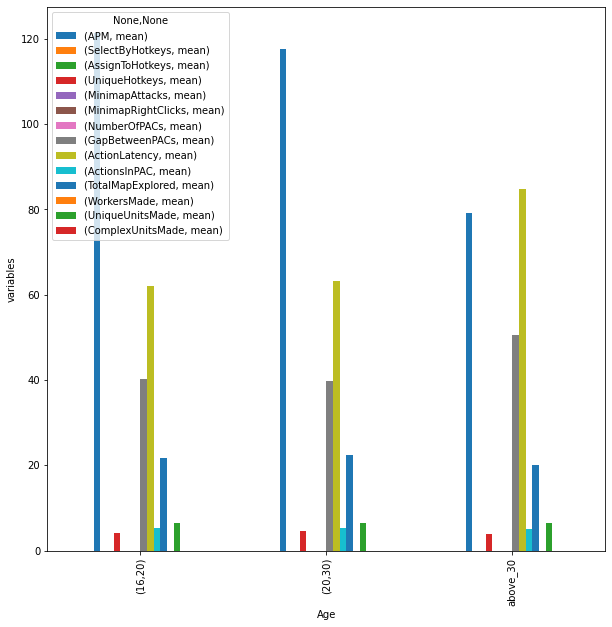

In [159]:
g.groupby(["Age"]).agg({'APM':["mean"],
       'SelectByHotkeys':["mean"], 'AssignToHotkeys':["mean"], 'UniqueHotkeys':["mean"], 'MinimapAttacks':["mean"],
       'MinimapRightClicks':["mean"], 'NumberOfPACs':["mean"], 'GapBetweenPACs':["mean"], 'ActionLatency':["mean"],
       'ActionsInPAC':["mean"], 'TotalMapExplored':["mean"], 'WorkersMade':["mean"], 'UniqueUnitsMade':["mean"],
       'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="variables")
plt.show()


### `APM`

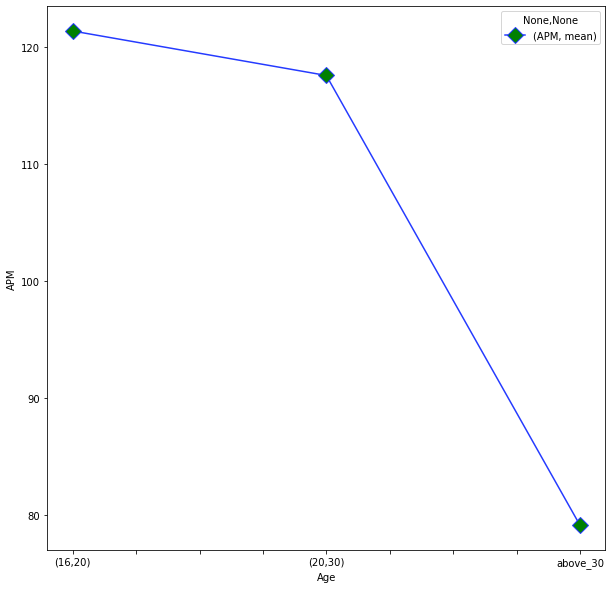

In [160]:
g.groupby(["Age"]).agg({'APM':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="APM",color="#253bff",marker="D",markerfacecolor='green', markersize=12)
plt.show()

It sows a negative relation as **age group** *increases* **APM** *decreases*

In [161]:
#g.columns

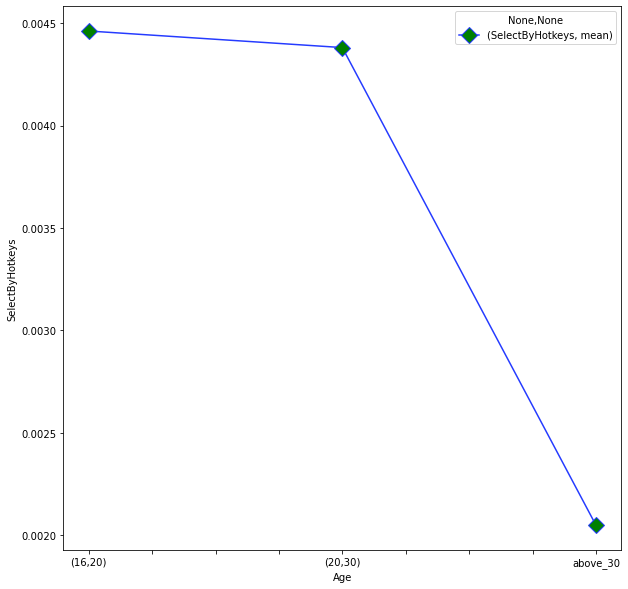

In [162]:
g.groupby(["Age"]).agg({'SelectByHotkeys':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="SelectByHotkeys",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

same goes for this too 

In [163]:
#g.columns

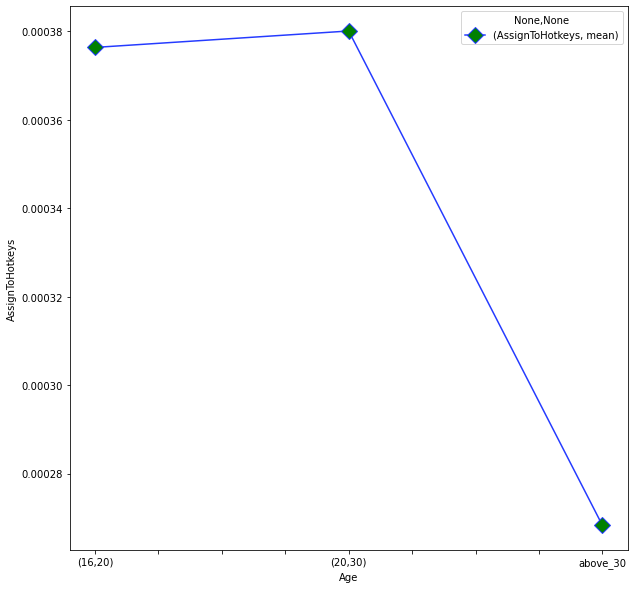

In [164]:
g.groupby(["Age"]).agg({'AssignToHotkeys':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="AssignToHotkeys",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

`AssignToHotkeys` show some **differnt pattern** as *slight increase* from **(16,20)** `age group` to **(20,30)**and then *decrease*

In [165]:
#g.columns

### `UniqueHotkeys`

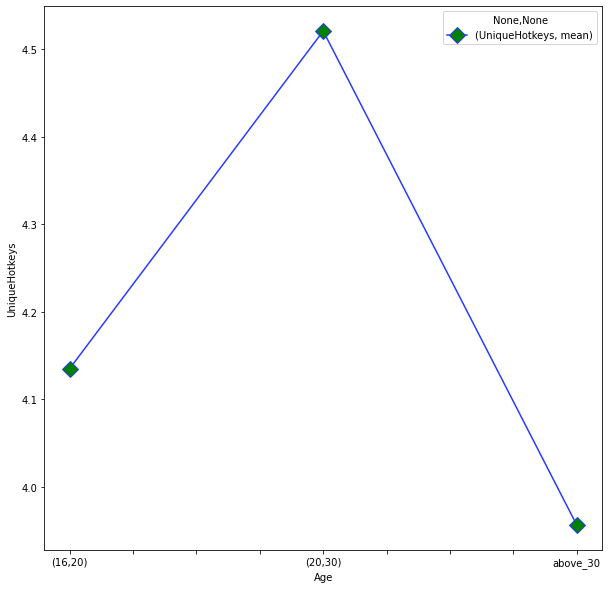

In [166]:
g.groupby(["Age"]).agg({'UniqueHotkeys':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="UniqueHotkeys",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

It has feature same to above but with darastic change 

In [167]:
#g.columns

### `MinimapAttacks`

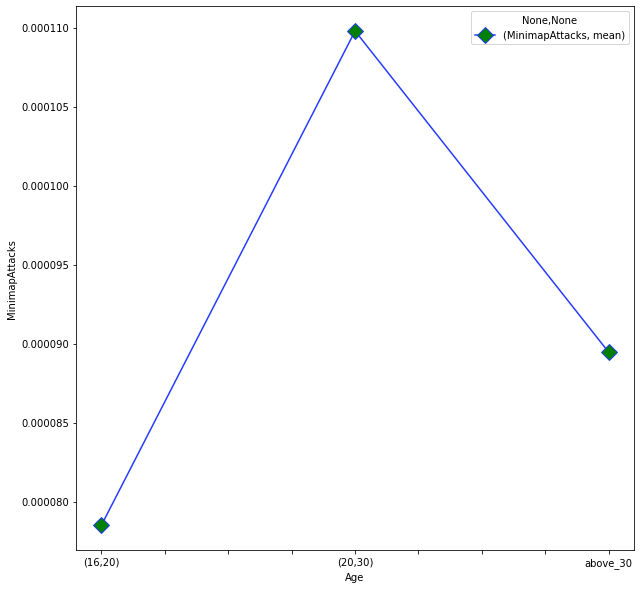

In [168]:
g.groupby(["Age"]).agg({'MinimapAttacks':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="MinimapAttacks",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

here age (16,20) is lowest and (20,30) is highest pattern is completely change

In [169]:
#g.columns

### `MinimapRightClicks`

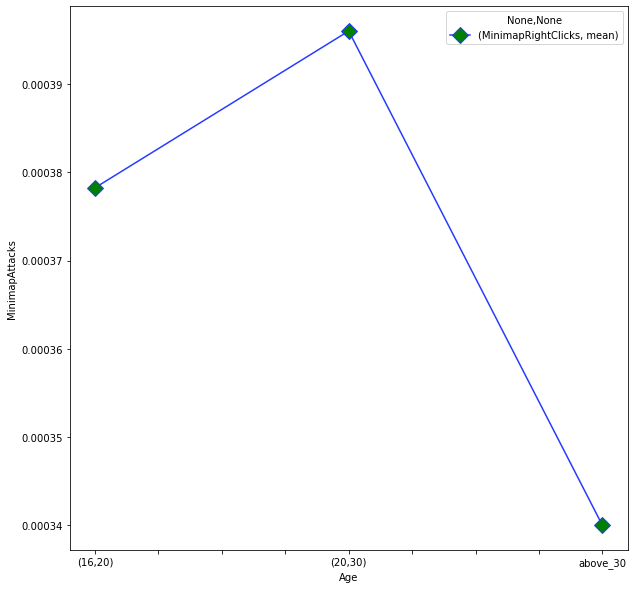

In [170]:
g.groupby(["Age"]).agg({'MinimapRightClicks':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="MinimapAttacks",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

`MinimapRightClicks with Age`  pattern is just **reverse  pattern** of `MinimapAttacks with Age`

In [171]:
#g.columns

### `NumberOfPACs`

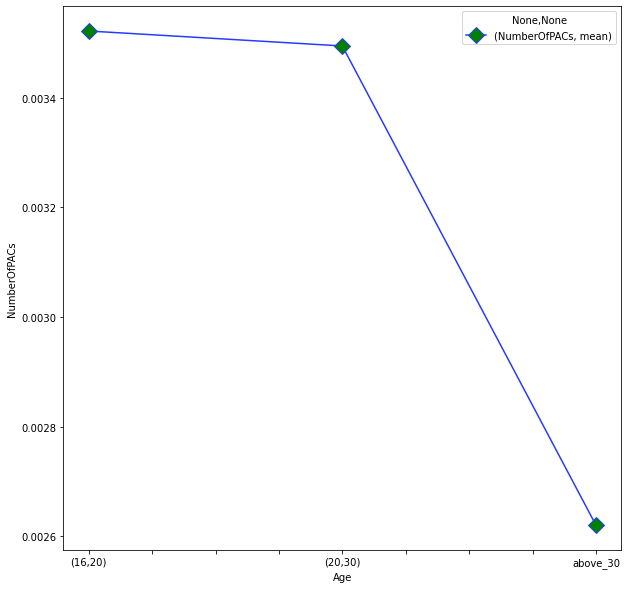

In [172]:
g.groupby(["Age"]).agg({'NumberOfPACs':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="NumberOfPACs",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

It shows a negative pattern with *Inc.* in `Age` `NumberOfPACs` *dec.*

In [173]:
#g.columns

### `GapBetweenPACs`

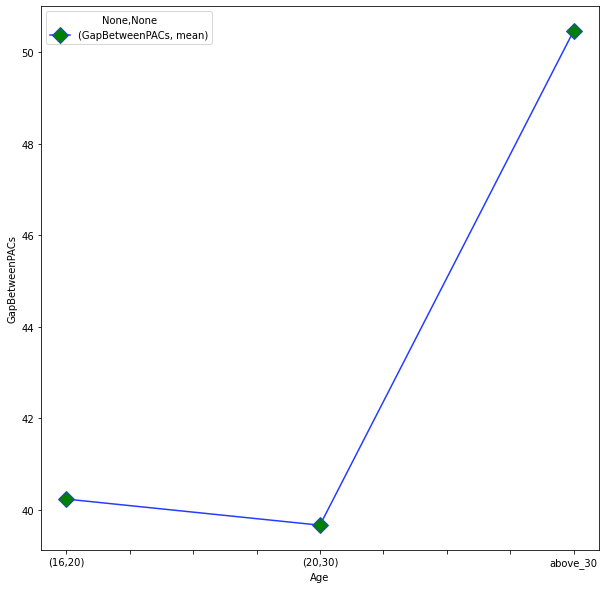

In [174]:
g.groupby(["Age"]).agg({'GapBetweenPACs':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="GapBetweenPACs",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

Here `GapBetweenPACs` is **least** for `Age` (20,30) and maximum for (above_30) which is slightly different from above variables

In [175]:
#g.columns

### `ActionLatency`

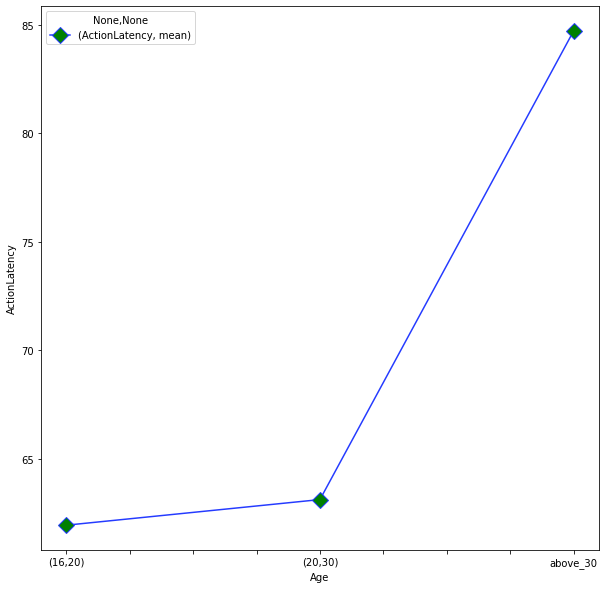

In [176]:
g.groupby(["Age"]).agg({'ActionLatency':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="ActionLatency",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

Here pattern is different `ActionLatency` is making postive relation with `Age`

In [177]:
#g.columns

### `ActionsInPAC`

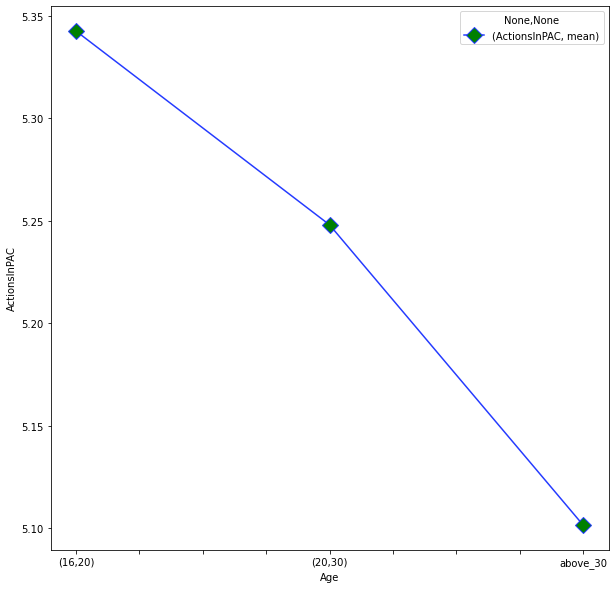

In [178]:
g.groupby(["Age"]).agg({'ActionsInPAC':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="ActionsInPAC",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

`ActionsInPAC` is making a negative relation with `Age`

In [179]:
#g.columns

### `TotalMapExplored`

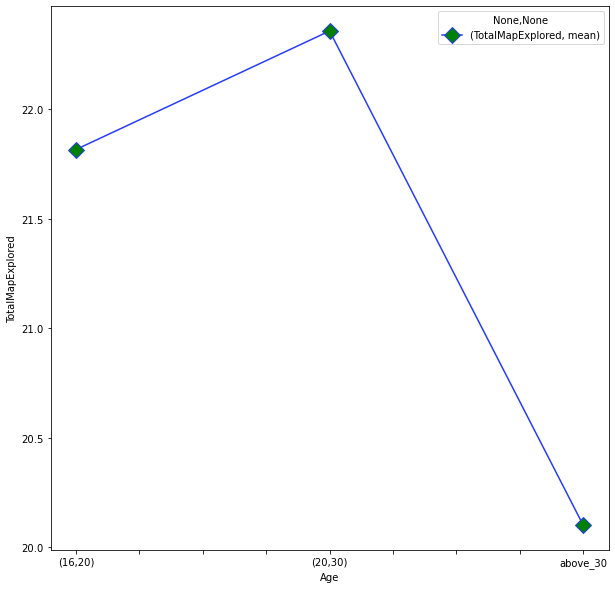

In [180]:
g.groupby(["Age"]).agg({'TotalMapExplored':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="TotalMapExplored",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

It is a regular pattern we are seeing in this

In [181]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `WorkersMade`

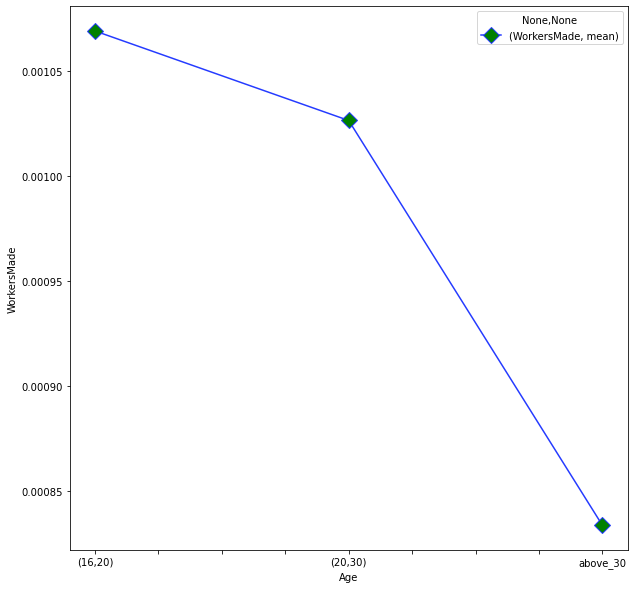

In [182]:
g.groupby(["Age"]).agg({'WorkersMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="WorkersMade",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

It is showing a negative relation  

In [183]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `UniqueUnitsMade`

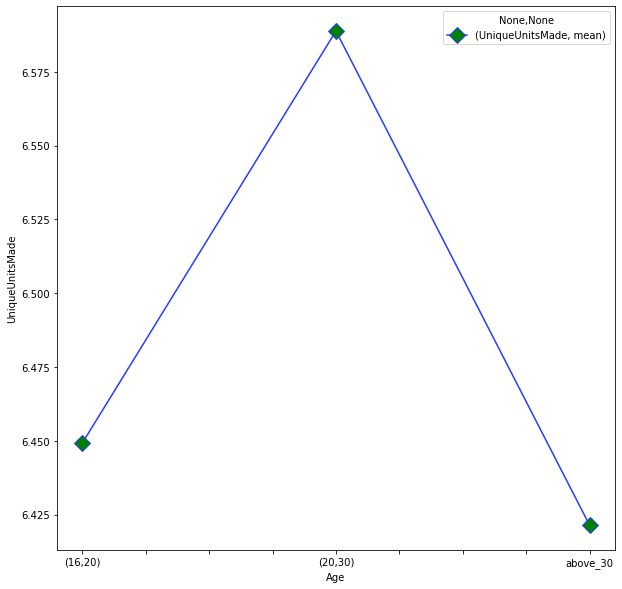

In [184]:
g.groupby(["Age"]).agg({'UniqueUnitsMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="UniqueUnitsMade",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

In [185]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `ComplexUnitsMade`

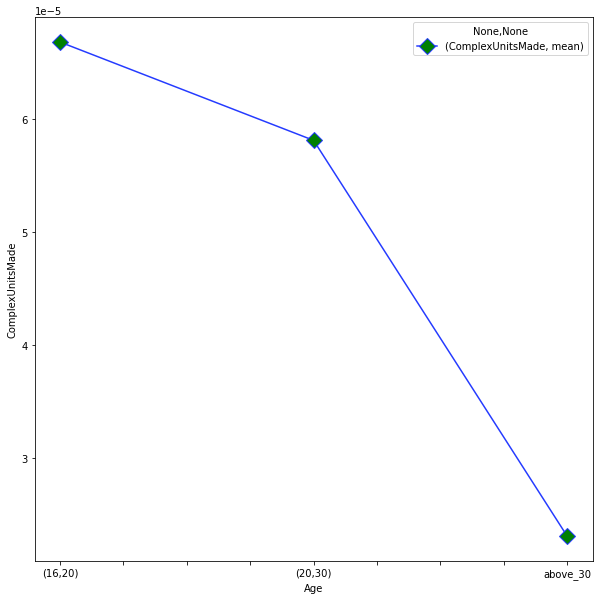

In [186]:
g.groupby(["Age"]).agg({'ComplexUnitsMade':["mean"]}).plot(kind="line",
                                     figsize=(10,10),
                                     xlabel="Age",
                                     ylabel="ComplexUnitsMade",color="#253bff",
                                    marker="D",markerfacecolor='green', markersize=12)
plt.show()

It shows a negative relation 

In [187]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `classification`

### Chi_square Test
- Ho: There is no relationship between Age & classification

- Ha: There is relationship/associativity between Age & classification

In [188]:
p=pd.crosstab(g["Age"],g["classification"])
calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)
print("Ho: There is no relationship between Age & classification")
print("Ha: There is relationship/associativity between Age & classification")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between Age and classification".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between Age and classification".format(pvalue))


Ho: There is no relationship between Age & classification
Ha: There is relationship/associativity between Age & classification
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.004129714840908904 which is very low.i.e,There is a significant Relationship between Age and classification


### `Age` relation with other variables is not same.

`Age` column contain 3 age groups which pocess different effect from other variable `Age` is categorical but it contain age group From **16 to 20  1st group, 20 to 30  2nd group ,30 and above 3rd group** which are in ascending order

1. Positive means  here with increase in age other variable values also increases

2. Negative means  here with increase in age other variable values also decreases

3. Random means both end and last group either is at bottom but middle group is at max.


With Age we cannot judge about the players Attributes clearly


In [189]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

## HoursPerWeek

### With Object data type

### TotalHours

### Chi_square Test
- Ho: There is no relationship between HoursPerWeek & TotalHours

- Ha: There is relationship/associativity between HoursPerWeek & TotalHours

In [190]:
p=pd.crosstab(g["HoursPerWeek"],g["TotalHours"])

calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between HoursPerWeek & TotalHours")
print("Ha: There is relationship/associativity between HoursPerWeek & TotalHours")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and TotalHours".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and TotalHours".format(pvalue))


Ho: There is no relationship between HoursPerWeek & TotalHours
Ha: There is relationship/associativity between HoursPerWeek & TotalHours
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 4.960379052514519e-48 which is very low.i.e,There is a significant Relationship between HoursPerWeek and TotalHours


In [191]:
#g.columns

### With numerical data types

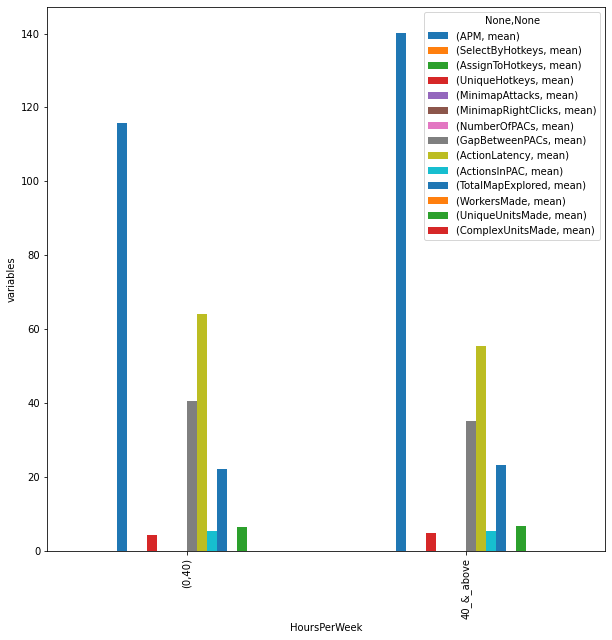

In [192]:
g.groupby(["HoursPerWeek"]).agg({'APM':["mean"],
       'SelectByHotkeys':["mean"], 'AssignToHotkeys':["mean"], 'UniqueHotkeys':["mean"], 'MinimapAttacks':["mean"],
       'MinimapRightClicks':["mean"], 'NumberOfPACs':["mean"], 'GapBetweenPACs':["mean"], 'ActionLatency':["mean"],
       'ActionsInPAC':["mean"], 'TotalMapExplored':["mean"], 'WorkersMade':["mean"], 'UniqueUnitsMade':["mean"],
       'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="HoursPerWeek",
                                     ylabel="variables")
plt.show()


### APM

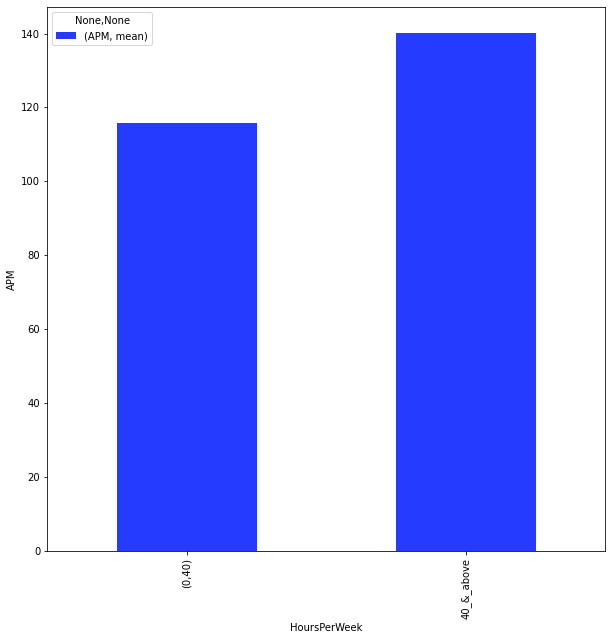

In [193]:
g.groupby(["HoursPerWeek"]).agg({'APM':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="HoursPerWeek",
                                     ylabel="APM",color="#253bff"
                                    )
plt.show()

Players playing more than `40 hrs per week` have more `APM` as because of heavy practice

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & APM

- Ha: There is relationship/associativity between HoursPerWeek & APM

In [194]:
# Finds out the APM data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['APM'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [143.718, 129.2322, 69.9612, 107.6016, 122.890...
40_&_above    [212.6022, 267.5586, 199.6854, 163.4436, 128.0...
Name: APM, dtype: object

In [195]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and APM are NOT correlated")
print("Ha: that HoursPerWeek and APM are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and APM".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and APM".format(pvalue))


Ho: that HoursPerWeek and APM are NOT correlated
Ha: that HoursPerWeek and APM are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 2.3041124596491555e-09 which is very low.i.e,There is a significant Relationship between HoursPerWeek and APM


In [196]:
#g.columns

### `SelectByHotkeys`

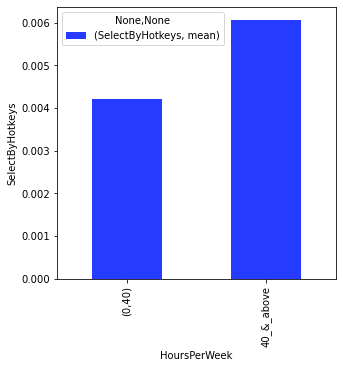

In [197]:
g.groupby(["HoursPerWeek"]).agg({'SelectByHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="SelectByHotkeys",color="#253bff"
                                    )
plt.show()

Same pattern as above 

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & SelectByHotkeys

- Ha: There is relationship/associativity between HoursPerWeek & SelectByHotkeys

In [198]:
# Finds out the SelectByHotkeys data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['SelectByHotkeys'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0035151591, 0.0033038124, 0.0011010906, 0.0...
40_&_above    [0.0090397391, 0.0278149343, 0.0051462973, 0.0...
Name: SelectByHotkeys, dtype: object

In [199]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and SelectByHotkeys are NOT correlated")
print("Ha: that HoursPerWeek and SelectByHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and SelectByHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and SelectByHotkeys".format(pvalue))


Ho: that HoursPerWeek and SelectByHotkeys are NOT correlated
Ha: that HoursPerWeek and SelectByHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 7.050837334138949e-06 which is very low.i.e,There is a significant Relationship between HoursPerWeek and SelectByHotkeys


In [200]:
#g.columns

### `AssignToHotkeys`

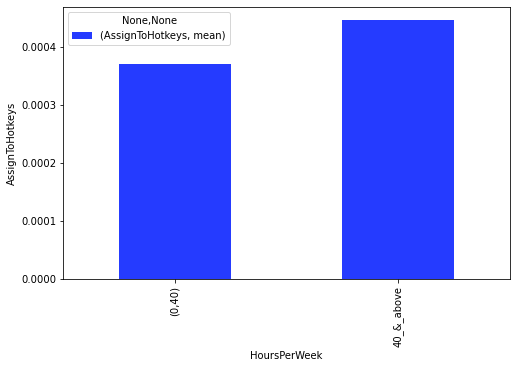

In [201]:
g.groupby(["HoursPerWeek"]).agg({'AssignToHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(8,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="AssignToHotkeys",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & AssignToHotkeys

- Ha: There is relationship/associativity between HoursPerWeek & AssignToHotkeys

In [202]:
# Finds out the AssignToHotkeys data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['AssignToHotkeys'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0002196974, 0.0002594617, 0.0003355705, 0.0...
40_&_above    [0.0006762401, 0.0007081596, 0.0004531331, 0.0...
Name: AssignToHotkeys, dtype: object

In [203]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and AssignToHotkeys are NOT correlated")
print("Ha: that HoursPerWeek and AssignToHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and AssignToHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and AssignToHotkeys".format(pvalue))


Ho: that HoursPerWeek and AssignToHotkeys are NOT correlated
Ha: that HoursPerWeek and AssignToHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.605829224336635e-05 which is very low.i.e,There is a significant Relationship between HoursPerWeek and AssignToHotkeys


In [204]:
#g.columns

### `UniqueHotkeys`

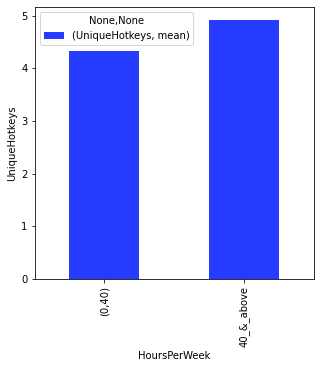

In [205]:
g.groupby(["HoursPerWeek"]).agg({'UniqueHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="UniqueHotkeys",color="#253bff"
                                    )
plt.show()

same as above

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & UniqueHotkeys

- Ha: There is relationship/associativity between HoursPerWeek & UniqueHotkeys

In [206]:
# Finds out the UniqueHotkeys data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['UniqueHotkeys'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [7, 4, 4, 1, 2, 2, 6, 2, 8, 4, 3, 1, 2, 2, 4, ...
40_&_above    [6, 10, 1, 4, 4, 2, 3, 4, 8, 7, 2, 4, 6, 7, 4,...
Name: UniqueHotkeys, dtype: object

In [207]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and UniqueHotkeys are NOT correlated")
print("Ha: that HoursPerWeek and UniqueHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and UniqueHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and UniqueHotkeys".format(pvalue))


Ho: that HoursPerWeek and UniqueHotkeys are NOT correlated
Ha: that HoursPerWeek and UniqueHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.0016426384833408633 which is very low.i.e,There is a significant Relationship between HoursPerWeek and UniqueHotkeys


In [208]:
#g.columns

### `MinimapAttacks`

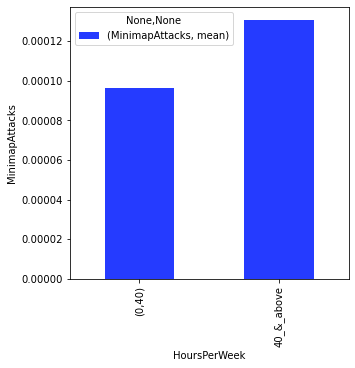

In [209]:
g.groupby(["HoursPerWeek"]).agg({'MinimapAttacks':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="MinimapAttacks",color="#253bff"
                                    )
plt.show()

same as above

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & MinimapAttacks

- Ha: There is relationship/associativity between HoursPerWeek & MinimapAttacks

In [210]:
# Finds out the MinimapAttacks data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['MinimapAttacks'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0001098487, 0.0002940566, 0.0002936242, 5.3...
40_&_above    [0.0011635308, 0.0, 3.23666494044536e-05, 0.00...
Name: MinimapAttacks, dtype: object

In [211]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and MinimapAttacks are NOT correlated")
print("Ha: that HoursPerWeek and MinimapAttacks are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and MinimapAttacks".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and MinimapAttacks".format(pvalue))


Ho: that HoursPerWeek and MinimapAttacks are NOT correlated
Ha: that HoursPerWeek and MinimapAttacks are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.008606240421692299 which is very low.i.e,There is a significant Relationship between HoursPerWeek and MinimapAttacks


In [212]:
#g.columns

### `MinimapRightClicks`

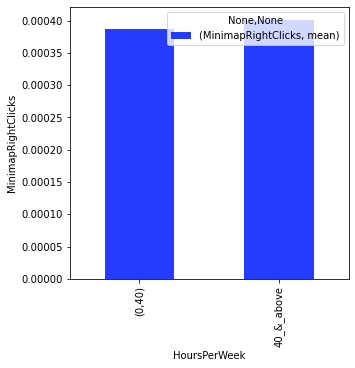

In [213]:
g.groupby(["HoursPerWeek"]).agg({'MinimapRightClicks':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="MinimapRightClicks",color="#253bff"
                                    )
plt.show()

both blocks are of nearly same height 

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & MinimapRightClicks

- Ha: There is relationship/associativity between HoursPerWeek & MinimapRightClicks

In [214]:
# Finds out the MinimapRightClicks data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['MinimapAttacks'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0001098487, 0.0002940566, 0.0002936242, 5.3...
40_&_above    [0.0011635308, 0.0, 3.23666494044536e-05, 0.00...
Name: MinimapAttacks, dtype: object

In [215]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and MinimapRightClicks are NOT correlated")
print("Ha: that HoursPerWeek and MinimapRightClicks are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and MinimapRightClicks".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and MinimapRightClicks".format(pvalue))


Ho: that HoursPerWeek and MinimapRightClicks are NOT correlated
Ha: that HoursPerWeek and MinimapRightClicks are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.008606240421692299 which is very low.i.e,There is a significant Relationship between HoursPerWeek and MinimapRightClicks


In [216]:
#g.columns

### `NumberOfPACs`

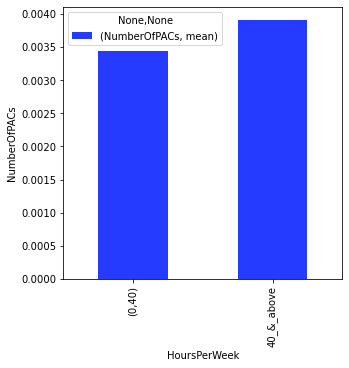

In [217]:
g.groupby(["HoursPerWeek"]).agg({'NumberOfPACs':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="NumberOfPACs",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & NumberOfPACs

- Ha: There is relationship/associativity between HoursPerWeek & NumberOfPACs

In [218]:
# Finds out the NumberOfPACs data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['NumberOfPACs'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0048490365, 0.0043070643, 0.002925755, 0.00...
40_&_above    [0.0049524643, 0.0056160988, 0.0047902641, 0.0...
Name: NumberOfPACs, dtype: object

In [219]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and NumberOfPACs are NOT correlated")
print("Ha: that HoursPerWeek and NumberOfPACs are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and NumberOfPACs".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and NumberOfPACs".format(pvalue))


Ho: that HoursPerWeek and NumberOfPACs are NOT correlated
Ha: that HoursPerWeek and NumberOfPACs are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.0504130064667721e-09 which is very low.i.e,There is a significant Relationship between HoursPerWeek and NumberOfPACs


In [220]:
#g.columns

### `GapBetweenPACs`

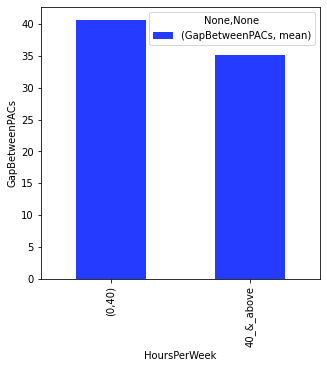

In [221]:
g.groupby(["HoursPerWeek"]).agg({'GapBetweenPACs':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="GapBetweenPACs",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & MinimapRightClicks

- Ha: There is relationship/associativity between HoursPerWeek & MinimapRightClicks

In [222]:
# Finds out the GapBetweenPACs data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['GapBetweenPACs'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [32.6677, 32.9194, 44.6475, 29.2203, 22.6885, ...
40_&_above    [24.6117, 34.6035, 25.3831, 27.2557, 25.2451, ...
Name: GapBetweenPACs, dtype: object

In [223]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and GapBetweenPACs are NOT correlated")
print("Ha: that HoursPerWeek and GapBetweenPACs are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and GapBetweenPACs".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and GapBetweenPACs".format(pvalue))


Ho: that HoursPerWeek and GapBetweenPACs are NOT correlated
Ha: that HoursPerWeek and GapBetweenPACs are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 3.9845991230286784e-05 which is very low.i.e,There is a significant Relationship between HoursPerWeek and GapBetweenPACs


In [224]:
#g.columns

### `ActionLatency`

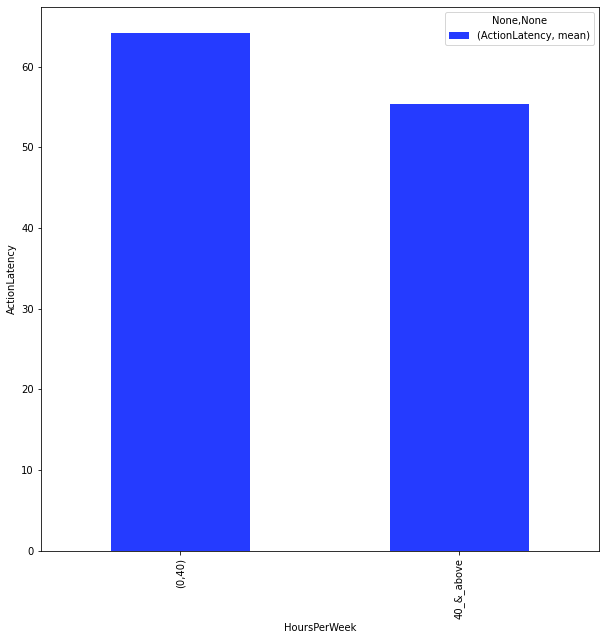

In [225]:
g.groupby(["HoursPerWeek"]).agg({'ActionLatency':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="HoursPerWeek",
                                     ylabel="ActionLatency",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & ActionLatency

- Ha: There is relationship/associativity between HoursPerWeek & ActionLatency

In [226]:
# Finds out the ActionLatency data for each HoursPerWeek as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['ActionLatency'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [40.8673, 42.3454, 75.3548, 53.7352, 62.0813, ...
40_&_above    [41.7671, 40.6025, 33.9054, 42.4514, 50.9612, ...
Name: ActionLatency, dtype: object

In [227]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and ActionLatency are NOT correlated")
print("Ha: that HoursPerWeek and ActionLatency are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and ActionLatency".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and ActionLatency".format(pvalue))


Ho: that HoursPerWeek and ActionLatency are NOT correlated
Ha: that HoursPerWeek and ActionLatency are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 6.483294398357181e-09 which is very low.i.e,There is a significant Relationship between HoursPerWeek and ActionLatency


In [228]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `ActionsInPAC`

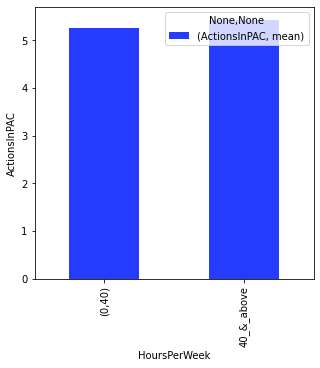

In [229]:
g.groupby(["HoursPerWeek"]).agg({'ActionsInPAC':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="ActionsInPAC",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & ActionsInPAC

- Ha: There is relationship/associativity between HoursPerWeek & ActionsInPAC

In [230]:
# Finds out the ActionsInPAC data for each HoursPerWeek cat. as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['ActionsInPAC'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [4.7508, 4.8434, 4.043, 4.9155, 9.374, 3.0965,...
40_&_above    [6.6104, 4.1629, 6.7095, 5.3681, 6.1395, 6.474...
Name: ActionsInPAC, dtype: object

In [231]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and ActionsInPAC are NOT correlated")
print("Ha: that HoursPerWeek and ActionsInPAC are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and ActionsInPAC".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and ActionsInPAC".format(pvalue))


Ho: that HoursPerWeek and ActionsInPAC are NOT correlated
Ha: that HoursPerWeek and ActionsInPAC are correlated
------------------------------------------------------------------------------------------------
We accept Ho (Null Hypothesis) as p value 0.15866260044520555 is good enough,There is a no significant Relationship between HoursPerWeek and ActionsInPAC


In [232]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `TotalMapExplored`

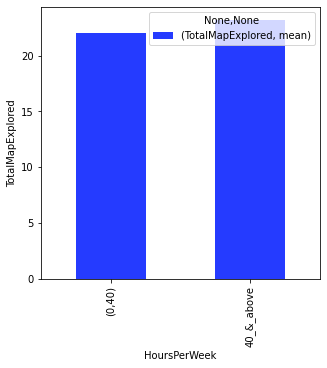

In [233]:
g.groupby(["HoursPerWeek"]).agg({'TotalMapExplored':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="TotalMapExplored",color="#253bff"
                                    )
plt.show()

both are nearly equal 

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & ActionsInPAC

- Ha: There is relationship/associativity between HoursPerWeek & ActionsInPAC

In [234]:
# Finds out the TotalMapExplored data for each HoursPerWeek cat. as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['TotalMapExplored'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [28, 22, 22, 19, 15, 16, 15, 29, 27, 24, 19, 1...
40_&_above    [42, 36, 29, 32, 20, 21, 23, 39, 23, 29, 22, 2...
Name: TotalMapExplored, dtype: object

In [235]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and TotalMapExplored are NOT correlated")
print("Ha: that HoursPerWeek and TotalMapExplored are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and TotalMapExplored".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and TotalMapExplored".format(pvalue))


Ho: that HoursPerWeek and TotalMapExplored are NOT correlated
Ha: that HoursPerWeek and TotalMapExplored are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.037794775191315945 which is very low.i.e,There is a significant Relationship between HoursPerWeek and TotalMapExplored


In [236]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `WorkersMade`

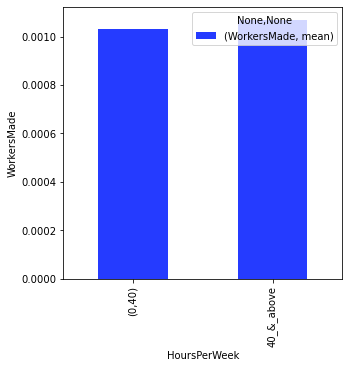

In [237]:
g.groupby(["HoursPerWeek"]).agg({'WorkersMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="WorkersMade",color="#253bff"
                                    )
plt.show()

both means are nearly equal

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no correlation  relationship between HoursPerWeek & WorkersMade

- Ha: There is relationship/associativity between HoursPerWeek & WorkersMade

In [238]:
# Finds out the WorkersMade data for each HoursPerWeek cat. as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['WorkersMade'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0013966, 0.0011935, 0.00074455, 0.0004262, ...
40_&_above    [0.0022773, 0.00085569, 0.0020876, 0.00084197,...
Name: WorkersMade, dtype: object

In [239]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and WorkersMade are NOT correlated")
print("Ha: that HoursPerWeek and WorkersMade are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and WorkersMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and WorkersMade".format(pvalue))


Ho: that HoursPerWeek and WorkersMade are NOT correlated
Ha: that HoursPerWeek and WorkersMade are correlated
------------------------------------------------------------------------------------------------
We accept Ho (Null Hypothesis) as p value 0.34292452299724585 is good enough,There is a no significant Relationship between HoursPerWeek and WorkersMade


In [240]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `UniqueUnitsMade`

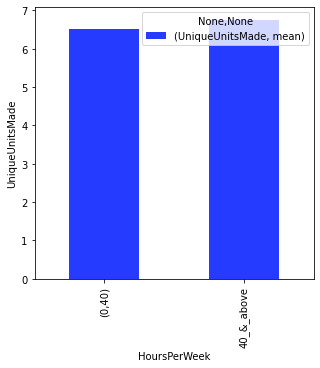

In [241]:
g.groupby(["HoursPerWeek"]).agg({'UniqueUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="UniqueUnitsMade",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between HoursPerWeek & UniqueUnitsMade

- Ha: There is relationship/associativity between HoursPerWeek & UniqueUnitsMade

In [242]:
# Finds out the UniqueUnitsMade data for each HoursPerWeek cat. as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['UniqueUnitsMade'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [6, 5, 6, 7, 4, 6, 5, 7, 6, 7, 7, 7, 5, 7, 6, ...
40_&_above    [9, 12, 7, 9, 8, 8, 6, 7, 7, 7, 6, 9, 9, 7, 8,...
Name: UniqueUnitsMade, dtype: object

In [243]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and UniqueUnitsMade are NOT correlated")
print("Ha: that HoursPerWeek and UniqueUnitsMade are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and UniqueUnitsMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and UniqueUnitsMade".format(pvalue))


Ho: that HoursPerWeek and UniqueUnitsMade are NOT correlated
Ha: that HoursPerWeek and UniqueUnitsMade are correlated
------------------------------------------------------------------------------------------------
We accept Ho (Null Hypothesis) as p value 0.12126381777433731 is good enough,There is a no significant Relationship between HoursPerWeek and UniqueUnitsMade


In [244]:
#g.columns

### `ComplexUnitsMade`

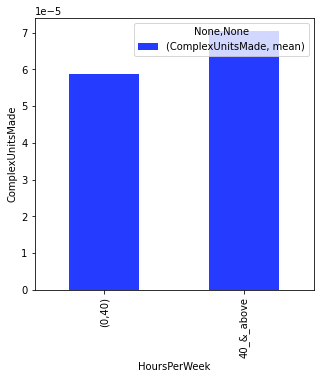

In [245]:
g.groupby(["HoursPerWeek"]).agg({'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="HoursPerWeek",
                                     ylabel="ComplexUnitsMade",color="#253bff"
                                    )
plt.show()

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between HoursPerWeek & ComplexUnitsMade

- Ha: There is relationship/associativity between HoursPerWeek & ComplexUnitsMade

In [246]:
# Finds out the ComplexUnitsMade data for each HoursPerWeek cat. as a list

CategoryGroupLists=g.groupby('HoursPerWeek')['ComplexUnitsMade'].apply(list)
CategoryGroupLists

HoursPerWeek
(0,40)        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00027279...
40_&_above    [0.0001292812, 8.85199464946101e-05, 0.0, 0.00...
Name: ComplexUnitsMade, dtype: object

In [247]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that HoursPerWeek and ComplexUnitsMade are NOT correlated")
print("Ha: that HoursPerWeek and ComplexUnitsMade are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and ComplexUnitsMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and ComplexUnitsMade".format(pvalue))


Ho: that HoursPerWeek and ComplexUnitsMade are NOT correlated
Ha: that HoursPerWeek and ComplexUnitsMade are correlated
------------------------------------------------------------------------------------------------
We accept Ho (Null Hypothesis) as p value 0.18245482997452803 is good enough,There is a no significant Relationship between HoursPerWeek and ComplexUnitsMade


### Classification

### Chi_square Test
- Ho: There is no relationship between HoursPerWeek  & classification
- Ha: There is relationship/associativity between HoursPerWeek  & classification



In [248]:
p=pd.crosstab(g["HoursPerWeek"],g["classification"])

calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between HoursPerWeek & classification")
print("Ha: There is relationship/associativity between HoursPerWeek & classification")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between HoursPerWeek and classification".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between HoursPerWeek and classification".format(pvalue))


Ho: There is no relationship between HoursPerWeek & classification
Ha: There is relationship/associativity between HoursPerWeek & classification
------------------------------------------------------------------------------------------------
We accept Ho (Null Hypothesis) as p value 0.3716407025005217 is good enough,There is a no significant Relationship between HoursPerWeek and classification


In [249]:
#g.columns

## TotalHours

### With numericals data types

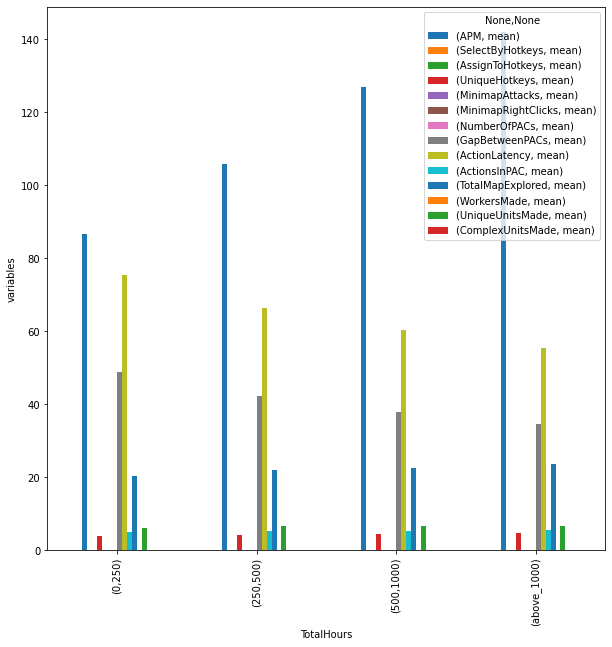

In [250]:
g.groupby(["TotalHours"]).agg({'APM':["mean"],
       'SelectByHotkeys':["mean"], 'AssignToHotkeys':["mean"], 'UniqueHotkeys':["mean"], 'MinimapAttacks':["mean"],
       'MinimapRightClicks':["mean"], 'NumberOfPACs':["mean"], 'GapBetweenPACs':["mean"], 'ActionLatency':["mean"],
       'ActionsInPAC':["mean"], 'TotalMapExplored':["mean"], 'WorkersMade':["mean"], 'UniqueUnitsMade':["mean"],
       'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(10,10),
                                     xlabel="TotalHours",
                                     ylabel="variables")
plt.show()


### `APM`

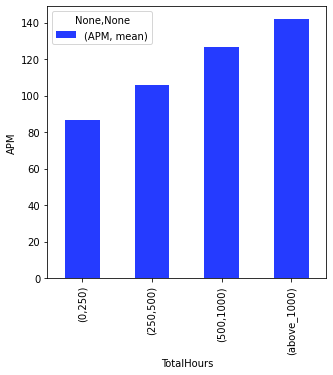

In [251]:
g.groupby(["TotalHours"]).agg({'APM':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="APM",color="#253bff"
                                    )
plt.show()

- Player palyong more have more APM 

- it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & APM

- Ha: There is relationship/associativity between TotalHours & APM

In [252]:
# Finds out the APM data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['APM'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [69.9612, 44.457, 46.9962, 79.2948, 160.6464, ...
(250,500)       [107.6016, 67.4754, 107.9118, 41.9094, 90.7686...
(500,1000)      [122.8908, 155.9856, 115.1274, 133.7016, 99.50...
(above_1000)    [143.718, 129.2322, 212.6022, 117.4884, 153.80...
Name: APM, dtype: object

In [253]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and APM are NOT correlated")
print("Ha: that TotalHours and APM are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and APM".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and APM".format(pvalue))


Ho: that TotalHours and APM are NOT correlated
Ha: that TotalHours and APM are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 3.7019758559013205e-104 which is very low.i.e,There is a significant Relationship between TotalHours and APM


In [254]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `SelectByHotkeys`

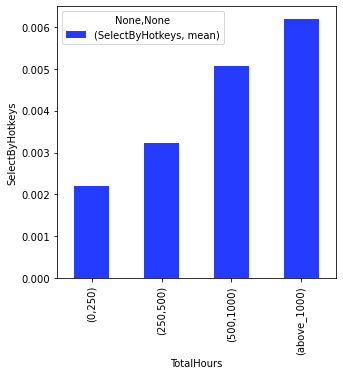

In [255]:
g.groupby(["TotalHours"]).agg({'SelectByHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="SelectByHotkeys",color="#253bff"
                                    )
plt.show()

Player playing more have more SelectByHotkeys command 

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & SelectByHotkeys

- Ha: There is relationship/associativity between TotalHours & SelectByHotkeys

In [256]:
# Finds out the SelectByHotkeys data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['SelectByHotkeys'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.0011010906, 0.0009783903, 0.0008201141, 0.0...
(250,500)       [0.0010335422, 0.0004225216, 0.0067013056, 0.0...
(500,1000)      [0.0011360136, 0.0050539084, 0.0026511485, 0.0...
(above_1000)    [0.0035151591, 0.0033038124, 0.0090397391, 0.0...
Name: SelectByHotkeys, dtype: object

In [257]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and SelectByHotkeys are NOT correlated")
print("Ha: that TotalHours and SelectByHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and SelectByHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and SelectByHotkeys".format(pvalue))


Ho: that TotalHours and SelectByHotkeys are NOT correlated
Ha: that TotalHours and SelectByHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 2.2983344603769015e-54 which is very low.i.e,There is a significant Relationship between TotalHours and SelectByHotkeys


In [258]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `AssignToHotkeys`

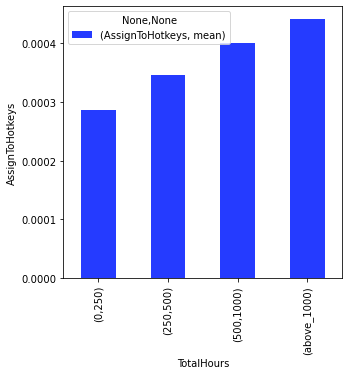

In [259]:
g.groupby(["TotalHours"]).agg({'AssignToHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="AssignToHotkeys",color="#253bff"
                                    )
plt.show()

Player playing more have more SelectByHotkeys command

it is a positive relation



### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & AssignToHotkeys

- Ha: There is relationship/associativity between TotalHours & AssignToHotkeys

In [260]:
# Finds out the AssignToHotkeys data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['AssignToHotkeys'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.0003355705, 0.0002552323, 0.0001685166, 0.0...
(250,500)       [0.0002131015, 0.0001690086, 0.0007061018, 0.0...
(500,1000)      [0.0003273259, 0.000524109, 0.000660037, 0.000...
(above_1000)    [0.0002196974, 0.0002594617, 0.0006762401, 0.0...
Name: AssignToHotkeys, dtype: object

In [261]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and AssignToHotkeys are NOT correlated")
print("Ha: that TotalHours and AssignToHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and AssignToHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and AssignToHotkeys".format(pvalue))


Ho: that TotalHours and AssignToHotkeys are NOT correlated
Ha: that TotalHours and AssignToHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.3145929849664068e-41 which is very low.i.e,There is a significant Relationship between TotalHours and AssignToHotkeys


In [262]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `UniqueHotkeys`

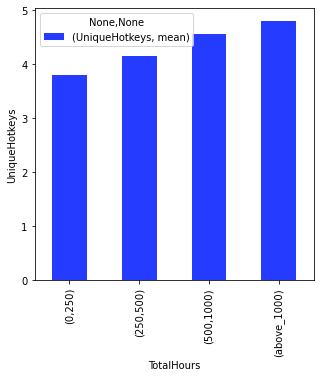

In [263]:
g.groupby(["TotalHours"]).agg({'UniqueHotkeys':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="UniqueHotkeys",color="#253bff"
                                    )
plt.show()

Player playing more have more SelectByHotkeys command

it is a positive relation


### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & UniqueHotkeys

- Ha: There is relationship/associativity between TotalHours & UniqueHotkeys

In [264]:
# Finds out the UniqueHotkeys data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['UniqueHotkeys'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [4, 2, 6, 3, 7, 6, 1, 4, 4, 4, 7, 4, 2, 5, 3, ...
(250,500)       [1, 1, 5, 0, 4, 0, 1, 2, 7, 0, 2, 1, 2, 4, 1, ...
(500,1000)      [2, 8, 8, 3, 1, 3, 4, 5, 6, 5, 9, 7, 2, 4, 0, ...
(above_1000)    [7, 4, 6, 2, 4, 2, 2, 4, 1, 5, 10, 4, 5, 4, 10...
Name: UniqueHotkeys, dtype: object

In [265]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and UniqueHotkeys are NOT correlated")
print("Ha: that TotalHours and UniqueHotkeys are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and UniqueHotkeys".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and UniqueHotkeys".format(pvalue))


Ho: that TotalHours and UniqueHotkeys are NOT correlated
Ha: that TotalHours and UniqueHotkeys are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 6.382177938995204e-16 which is very low.i.e,There is a significant Relationship between TotalHours and UniqueHotkeys


In [266]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `MinimapAttacks`

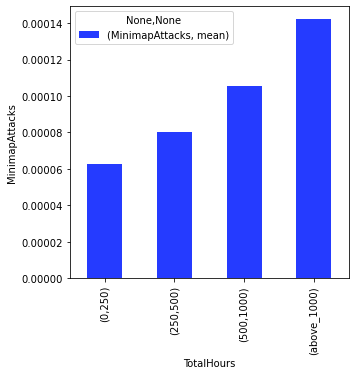

In [267]:
g.groupby(["TotalHours"]).agg({'MinimapAttacks':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="MinimapAttacks",color="#253bff"
                                    )
plt.show()

Player playing more have more SelectByHotkeys command

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & MinimapAttacks

- Ha: There is relationship/associativity between TotalHours & MinimapAttacks

In [268]:
# Finds out the MinimapAttacks data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['MinimapAttacks'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.0002936242, 0.0, 0.0, 1.64581961816985e-05,...
(250,500)       [5.32753697310659e-05, 2.41440919407021e-05, 1...
(500,1000)      [0.0, 2.49575721273834e-05, 9.90055443104814e-...
(above_1000)    [0.0001098487, 0.0002940566, 0.0011635308, 1.8...
Name: MinimapAttacks, dtype: object

In [269]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and MinimapAttacks are NOT correlated")
print("Ha: that TotalHours and MinimapAttacks are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and MinimapAttacks".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and MinimapAttacks".format(pvalue))


Ho: that TotalHours and MinimapAttacks are NOT correlated
Ha: that TotalHours and MinimapAttacks are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.5060241496266985e-18 which is very low.i.e,There is a significant Relationship between TotalHours and MinimapAttacks


In [270]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `MinimapRightClicks`

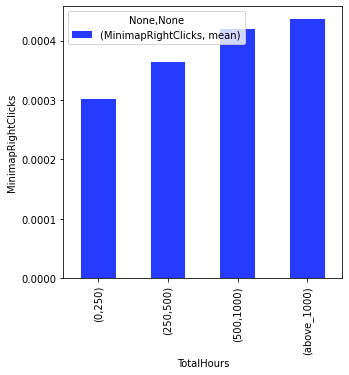

In [271]:
g.groupby(["TotalHours"]).agg({'MinimapRightClicks':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="MinimapRightClicks",color="#253bff"
                                    )
plt.show()

Player playing more have more MinimapRightClicks command

it is a positive relation



### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & MinimapRightClicks

- Ha: There is relationship/associativity between TotalHours & MinimapRightClicks

In [272]:
# Finds out the MinimapRightClicks data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['MinimapRightClicks'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.0004614094, 0.0, 4.4937761200737e-05, 0.000...
(250,500)       [0.0005434088, 0.0001448646, 0.0004662936, 0.0...
(500,1000)      [0.0013285582, 0.0003993212, 0.0006930388, 7.4...
(above_1000)    [0.0003923169, 0.0004324362, 0.0012530331, 0.0...
Name: MinimapRightClicks, dtype: object

In [273]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and MinimapRightClicks are NOT correlated")
print("Ha: that TotalHours and MinimapRightClicks are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and MinimapRightClicks".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and MinimapRightClicks".format(pvalue))


Ho: that TotalHours and MinimapRightClicks are NOT correlated
Ha: that TotalHours and MinimapRightClicks are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 2.4142479204837988e-12 which is very low.i.e,There is a significant Relationship between TotalHours and MinimapRightClicks


In [274]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `NumberOfPACs`

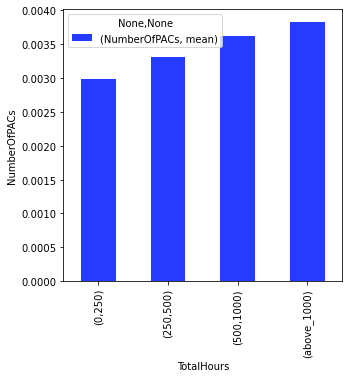

In [275]:
g.groupby(["TotalHours"]).agg({'NumberOfPACs':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="NumberOfPACs",color="#253bff"
                                    )
plt.show()

Player playing more have more NumberOfPACs 

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & NumberOfPACs

- Ha: There is relationship/associativity between TotalHours & NumberOfPACs

In [276]:
# Finds out the NumberOfPACs data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['NumberOfPACs'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.002925755, 0.0024247065, 0.0019884959, 0.00...
(250,500)       [0.0037825513, 0.002885219, 0.0032374101, 0.00...
(500,1000)      [0.0023682994, 0.0035689328, 0.0041472322, 0.0...
(above_1000)    [0.0048490365, 0.0043070643, 0.0049524643, 0.0...
Name: NumberOfPACs, dtype: object

In [277]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and NumberOfPACs are NOT correlated")
print("Ha: that TotalHours and NumberOfPACs are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and NumberOfPACs".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and NumberOfPACs".format(pvalue))


Ho: that TotalHours and NumberOfPACs are NOT correlated
Ha: that TotalHours and NumberOfPACs are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 3.4484225413419466e-63 which is very low.i.e,There is a significant Relationship between TotalHours and NumberOfPACs


In [278]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `GapBetweenPACs`

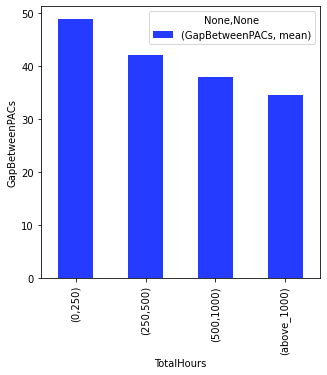

In [279]:
g.groupby(["TotalHours"]).agg({'GapBetweenPACs':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="GapBetweenPACs",color="#253bff"
                                    )
plt.show()

Player playing more have less GapBetweenPACs 

it is a negative relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & GapBetweenPACs

- Ha: There is relationship/associativity between TotalHours & GapBetweenPACs

In [280]:
# Finds out the GapBetweenPACs data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['GapBetweenPACs'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [44.6475, 76.4405, 94.0227, 39.6381, 28.3636, ...
(250,500)       [29.2203, 42.437, 67.0744, 54.4677, 44.7424, 4...
(500,1000)      [22.6885, 24.4632, 30.766, 21.4686, 22.7265, 5...
(above_1000)    [32.6677, 32.9194, 24.6117, 52.014, 23.4107, 5...
Name: GapBetweenPACs, dtype: object

In [281]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT correlated")
print("Ha: that TotalHours and GapBetweenPACs are correlated")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and GapBetweenPACs".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and GapBetweenPACs".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT correlated
Ha: that TotalHours and GapBetweenPACs are correlated
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.5338955551575254e-60 which is very low.i.e,There is a significant Relationship between TotalHours and GapBetweenPACs


In [282]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `ActionLatency`

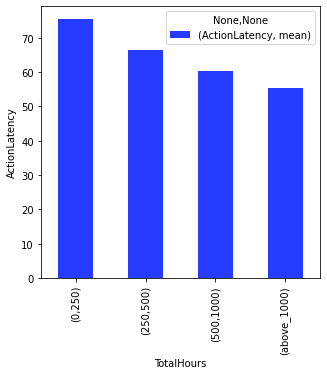

In [283]:
g.groupby(["TotalHours"]).agg({'ActionLatency':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="ActionLatency",color="#253bff"
                                    )
plt.show()

Player playing more have less ActionLatency

it is a negative relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & ActionLatency

- Ha: There is relationship/associativity between TotalHours & ActionLatency

In [284]:
# Finds out the ActionLatency data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['ActionLatency'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [75.3548, 98.7719, 90.5311, 65.5, 37.7947, 45....
(250,500)       [53.7352, 68.0502, 71.3251, 91.3069, 59.5321, ...
(500,1000)      [62.0813, 52.1538, 49.4854, 50.5253, 68.7321, ...
(above_1000)    [40.8673, 42.3454, 41.7671, 46.4321, 48.0711, ...
Name: ActionLatency, dtype: object

In [285]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT ActionLatency")
print("Ha: that TotalHours and GapBetweenPACs are ActionLatency")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and ActionLatency".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and ActionLatency".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT ActionLatency
Ha: that TotalHours and GapBetweenPACs are ActionLatency
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 3.0412319219042447e-95 which is very low.i.e,There is a significant Relationship between TotalHours and ActionLatency


In [286]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `ActionsInPAC`

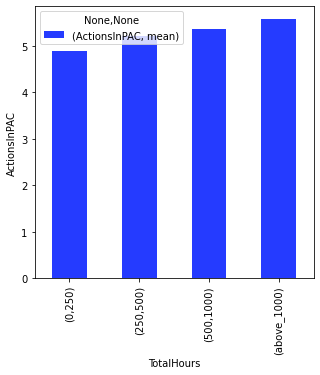

In [287]:
g.groupby(["TotalHours"]).agg({'ActionsInPAC':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="ActionsInPAC",color="#253bff"
                                    )
plt.show()

Player playing more have ActionsInPAC

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & ActionsInPAC

- Ha: There is relationship/associativity between TotalHours & ActionsInPAC

In [288]:
# Finds out the ActionsInPAC data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['ActionsInPAC'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [4.043, 3.0965, 4.1017, 4.2269, 4.7671, 4.9077...
(250,500)       [4.9155, 4.3222, 4.3786, 3.6881, 4.5698, 5.079...
(500,1000)      [9.374, 6.5664, 4.679, 5.4892, 6.7054, 2.8663,...
(above_1000)    [4.7508, 4.8434, 6.6104, 3.3746, 7.0044, 6.229...
Name: ActionsInPAC, dtype: object

In [289]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT ActionsInPAC")
print("Ha: that TotalHours and GapBetweenPACs are ActionsInPAC")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and ActionsInPAC".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and ActionsInPAC".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT ActionsInPAC
Ha: that TotalHours and GapBetweenPACs are ActionsInPAC
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.9417922587589198e-16 which is very low.i.e,There is a significant Relationship between TotalHours and ActionsInPAC


In [290]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `TotalMapExplored`

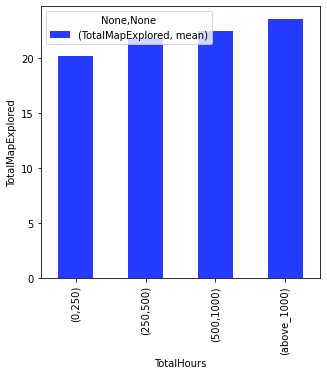

In [291]:
g.groupby(["TotalHours"]).agg({'TotalMapExplored':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="TotalMapExplored",color="#253bff"
                                    )
plt.show()

Player playing more have TotalMapExplored

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & TotalMapExplored

- Ha: There is relationship/associativity between TotalHours & TotalMapExplored

In [292]:
# Finds out the TotalMapExplored data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['TotalMapExplored'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [22, 16, 15, 19, 29, 14, 41, 11, 17, 15, 32, 2...
(250,500)       [19, 16, 27, 17, 15, 14, 29, 15, 24, 22, 22, 1...
(500,1000)      [15, 27, 30, 29, 23, 31, 18, 36, 34, 22, 42, 2...
(above_1000)    [28, 22, 42, 29, 24, 21, 28, 15, 13, 16, 36, 2...
Name: TotalMapExplored, dtype: object

In [293]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT TotalMapExplored")
print("Ha: that TotalHours and GapBetweenPACs are TotalMapExplored")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and TotalMapExplored".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and TotalMapExplored".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT TotalMapExplored
Ha: that TotalHours and GapBetweenPACs are TotalMapExplored
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 5.441228977456803e-16 which is very low.i.e,There is a significant Relationship between TotalHours and TotalMapExplored


In [294]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `WorkersMade`

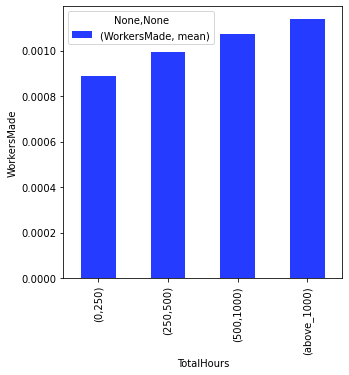

In [295]:
g.groupby(["TotalHours"]).agg({'WorkersMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="WorkersMade",color="#253bff"
                                    )
plt.show()

Player playing more have made workers in the game

it is a positive relation


### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & WorkersMade

- Ha: There is relationship/associativity between TotalHours & WorkersMade

In [296]:
# Finds out the WorkersMade data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['WorkersMade'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.00074455, 0.00037221, 0.00057296, 0.0007570...
(250,500)       [0.0004262, 0.00074847, 0.0013323, 0.00066817,...
(500,1000)      [0.0011745, 0.0013103, 0.00082505, 0.0010083, ...
(above_1000)    [0.0013966, 0.0011935, 0.0022773, 0.0010347, 0...
Name: WorkersMade, dtype: object

In [297]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT WorkersMade")
print("Ha: that TotalHours and GapBetweenPACs are WorkersMade")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and WorkersMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and WorkersMade".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT WorkersMade
Ha: that TotalHours and GapBetweenPACs are WorkersMade
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 1.3670258706322807e-19 which is very low.i.e,There is a significant Relationship between TotalHours and WorkersMade


In [298]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `UniqueUnitsMade`

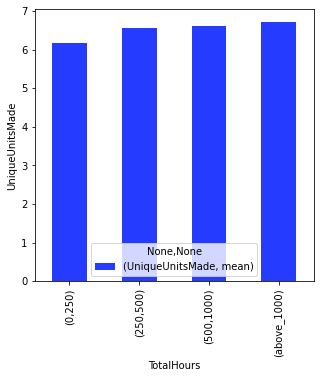

In [299]:
g.groupby(["TotalHours"]).agg({'UniqueUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="UniqueUnitsMade",color="#253bff"
                                    )
plt.show()

Player playing more have made Unique Units in the game

it is a positive relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & UniqueUnitsMade

- Ha: There is relationship/associativity between TotalHours & UniqueUnitsMade

In [300]:
# Finds out the WorkersMade data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['UniqueUnitsMade'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [6, 6, 5, 7, 10, 6, 6, 4, 6, 6, 8, 6, 6, 8, 3,...
(250,500)       [7, 7, 9, 6, 6, 6, 6, 4, 8, 6, 7, 4, 5, 7, 7, ...
(500,1000)      [4, 6, 8, 10, 7, 9, 5, 11, 5, 4, 9, 6, 4, 6, 7...
(above_1000)    [6, 5, 9, 7, 7, 5, 7, 6, 6, 5, 12, 8, 5, 9, 8,...
Name: UniqueUnitsMade, dtype: object

In [301]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT UniqueUnitsMade")
print("Ha: that TotalHours and GapBetweenPACs are UniqueUnitsMade")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and UniqueUnitsMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and UniqueUnitsMade".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT UniqueUnitsMade
Ha: that TotalHours and GapBetweenPACs are UniqueUnitsMade
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 7.74068580277567e-08 which is very low.i.e,There is a significant Relationship between TotalHours and UniqueUnitsMade


In [302]:
g.columns

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification'],
      dtype='object')

### `ComplexUnitsMade`

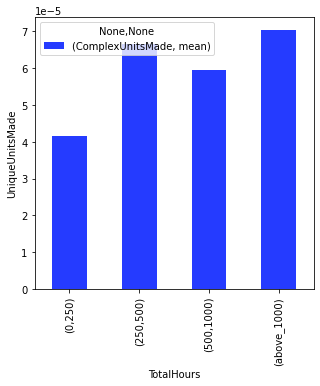

In [303]:
g.groupby(["TotalHours"]).agg({'ComplexUnitsMade':["mean"]}).plot(kind="bar",
                                     figsize=(5,5),
                                     xlabel="TotalHours",
                                     ylabel="UniqueUnitsMade",color="#253bff"
                                    )
plt.show()

it is a up down up bar graph 

it is no clear relation

### Anova Test

`f_oneway()` function takes the group data as input and 
returns **F-statistic and P-value**

- Ho: There is no relationship between TotalHours & ComplexUnitsMade

- Ha: There is relationship/associativity between TotalHours & ComplexUnitsMade

In [304]:
# Finds out the ComplexUnitsMade data for each TotalHours cat. as a list

CategoryGroupLists=g.groupby('TotalHours')['ComplexUnitsMade'].apply(list)
CategoryGroupLists

TotalHours
(0,250)         [0.0, 0.0, 0.0, 0.0001069783, 8.73973081629086...
(250,500)       [0.0, 0.0, 0.0002398082, 0.0, 0.0, 2.607154030...
(500,1000)      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028405...
(above_1000)    [0.0, 0.0, 0.0001292812, 0.0002727923, 0.0, 0....
Name: ComplexUnitsMade, dtype: object

In [305]:
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
f,pvalue= sp.f_oneway(*CategoryGroupLists)
print("Ho: that TotalHours and GapBetweenPACs are NOT ComplexUnitsMade")
print("Ha: that TotalHours and GapBetweenPACs are ComplexUnitsMade")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and ComplexUnitsMade".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and ComplexUnitsMade".format(pvalue))


Ho: that TotalHours and GapBetweenPACs are NOT ComplexUnitsMade
Ha: that TotalHours and GapBetweenPACs are ComplexUnitsMade
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 8.600694185348999e-06 which is very low.i.e,There is a significant Relationship between TotalHours and ComplexUnitsMade


### Classification


### Chi_square Test
- Ho: There is no relationship between HoursPerWeek & classification
- Ha: There is relationship/associativity between HoursPerWeek & classification


In [306]:
p=pd.crosstab(g["TotalHours"],g["classification"])

calc_chisquare, pvalue, dof, E=sp.chi2_contingency(p)

print("Ho: There is no relationship between TotalHours & classification")
print("Ha: There is relationship/associativity between TotalHours & classification")
print("------------------------------------------------------------------------------------------------")
if pvalue<0.05:
    print("We fail to accept Ho (Null Hypothesis) as p value {} which is very low.i.e,There is a significant Relationship between TotalHours and classification".format(pvalue))
else:
    print("We accept Ho (Null Hypothesis) as p value {} is good enough,There is a no significant Relationship between TotalHours and classification".format(pvalue))


Ho: There is no relationship between TotalHours & classification
Ha: There is relationship/associativity between TotalHours & classification
------------------------------------------------------------------------------------------------
We fail to accept Ho (Null Hypothesis) as p value 0.01738993174727874 which is very low.i.e,There is a significant Relationship between TotalHours and classification


***
Majorally the relation of `total hours` column is good with other variables

***
***

We can tell abt the players attribute by noticing the time he/she has givn in the game

***

***
Only three attributes show diff Two of them are negative `GapBetweenPACs` and `ActionLatency` other is `ComplexUnitsMade` which shows a randomn behavior.

***

For bivaraite analysys of Numerical Data

In [307]:
#Preparing a different data frame
g1=g[[ 'APM','SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade']]

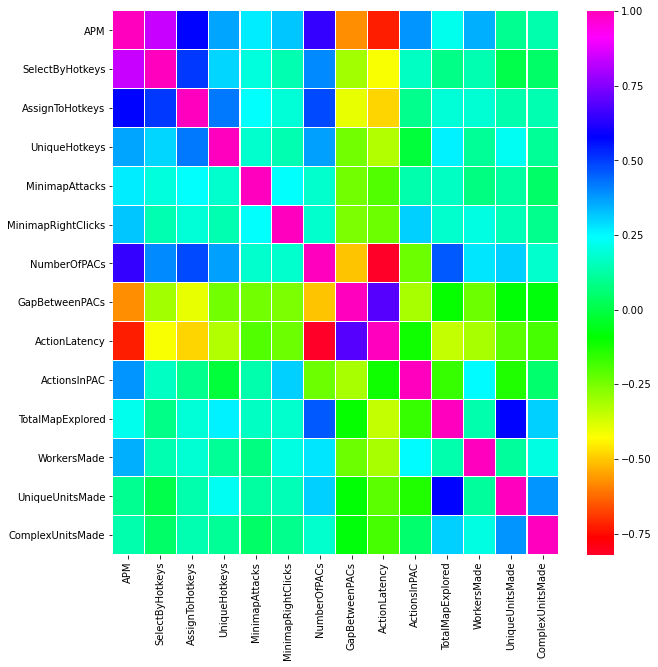

In [308]:
c=g1.corr()#correlation
#plotting the correlation by using seaborn
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(c, ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

From here we can say that,

1. `APM` makes positive correlation with `SelectByHotkeys`. as player with Action per minute will select hot keys fast.

2. `ActionLatency` makes negative correlation with `APM` and `NumberOfPACs`.AS player **he/she is not able to maintain continuous flow of information and action between the brain and the world around it** leads to **delay in action**

On plotting the above relations we get,

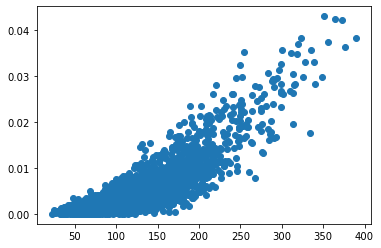

In [309]:
plt.scatter(g1["APM"],g1["SelectByHotkeys"])
plt.show()

As player with Action per minute will select hot keys fast.

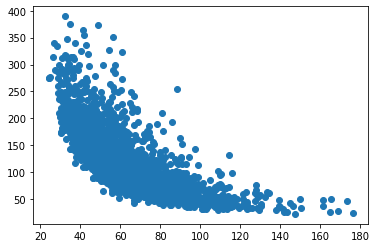

In [310]:
plt.scatter(g1["ActionLatency"],g1["APM"])
plt.show()

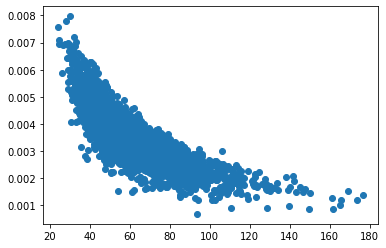

In [311]:
plt.scatter(g1["ActionLatency"],g1["NumberOfPACs"])
plt.show()

A player **he/she is not able to maintain continuous flow of information and action between the brain and the world around it** leads to **delay in action**


### So from Above correlation,

We drop `ActionLatency` and `SelectByHotkeys` 

- because  APM serve relationship with both ActionLatency & SelectByHotkeys. so APM is important attribute 

- NumberofPACs only serve strong  relation with Action latency So, it cannot de dropped


In [312]:
g.drop(columns=["ActionLatency",'SelectByHotkeys'],inplace=True)

In [313]:
g["LeagueIndex"]=g["LeagueIndex"].astype("str")

In [314]:
g=pd.get_dummies(g,columns=['Age', 'HoursPerWeek', 'TotalHours','LeagueIndex'],drop_first=True)

In [315]:
g.shape

(3395, 26)

In [316]:
g2=g.copy()
g3=g.copy()

### Outlier Treatment by z-score

In [317]:
from scipy import stats

In [318]:
#finding z score of each record
z = np.abs(stats.zscore(g2))
print(z)#printing the z_score

[[0.51352069 0.68420705 1.11667897 ... 0.47314317 0.10206207 0.12832407]
 [0.23461314 0.50739862 0.15451532 ... 0.47314317 0.10206207 0.12832407]
 [0.90658234 0.16898762 0.15451532 ... 0.47314317 0.10206207 0.12832407]
 ...
 [3.51154293 2.16379791 1.11667897 ... 0.47314317 0.10206207 7.79277054]
 [4.98327325 0.98127579 0.26921611 ... 0.47314317 0.10206207 7.79277054]
 [4.45362269 1.94573969 0.15451532 ... 0.47314317 0.10206207 7.79277054]]


Area between (-3,3) is selected 

In [319]:
g2 = g2[(z < 3).all(axis=1)]#value less than -3 and more than +3 will be droped

In [320]:
g2.shape

(2687, 26)

In [321]:
g.shape

(3395, 26)

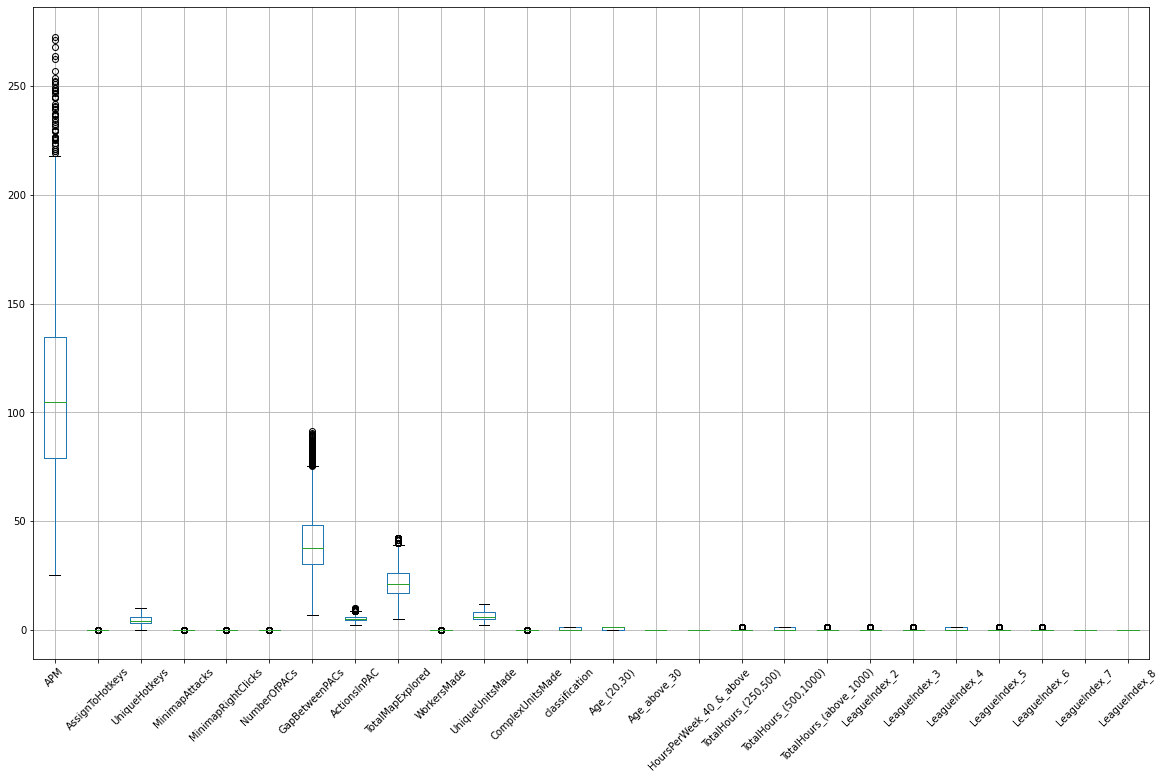

In [322]:
g2.boxplot(figsize=(20,12))
plt.xticks(rotation=45)
plt.show()


Even after removing outliers from the data their are some ouliers are still present If we change the selected region then we will loose more data so it is better to do capping  

In [323]:
#creating function for capping
def z_score_capping(X, cols, thr):
    
    for cols in cols:
        m= X[cols].mean()
        std= X[cols].std()

        upper= m+(thr*std)
        lower= m-(thr*std)

        X[cols]=np.where(X[cols]>upper,upper,X[cols])
        X[cols]=np.where(X[cols]<lower,lower,X[cols])

In [324]:
z_score_capping(g3,g3.columns,2)#thr is 2 becomes on using 3 there some outliers donot get removed

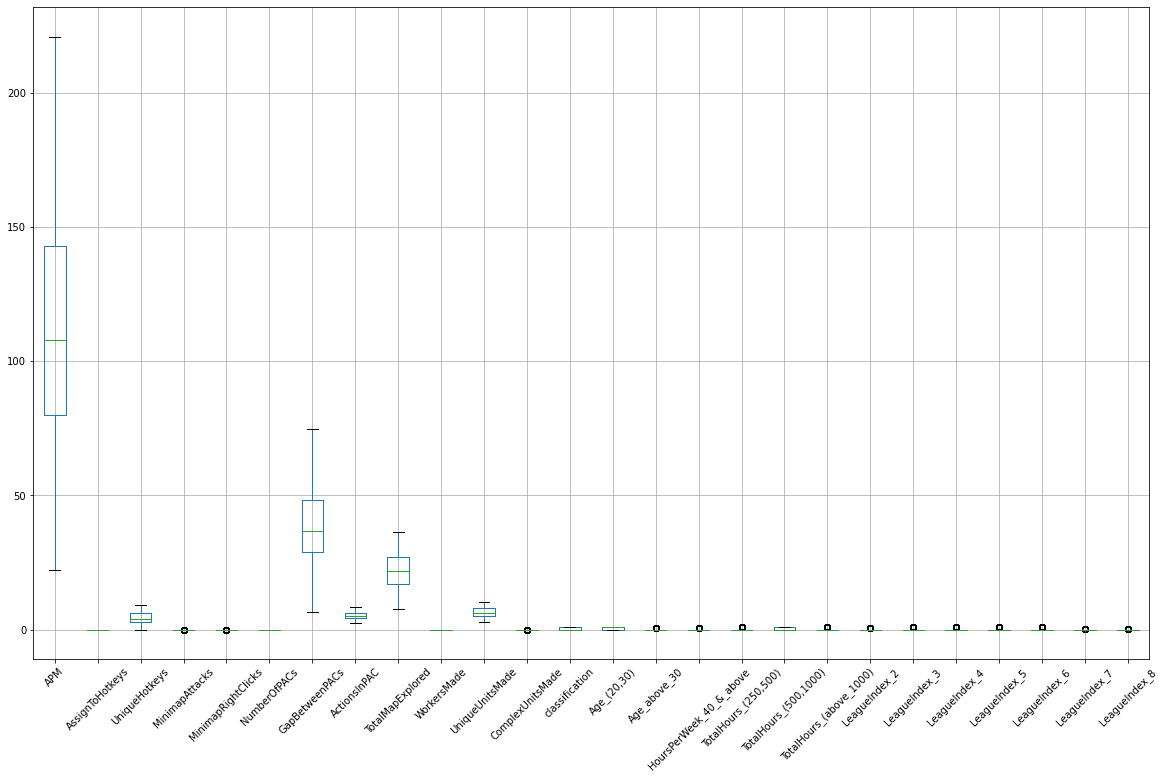

In [325]:
g3.boxplot(figsize=(20,12))
plt.xticks(rotation=45)
plt.show()


All most all the outliers are gone now this data becomes noice less and will be used for further analysis 

Dividing the data in to X and y

In [326]:
g3.columns

Index(['APM', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionsInPAC',
       'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'classification', 'Age_(20,30)', 'Age_above_30',
       'HoursPerWeek_40_&_above', 'TotalHours_(250,500)',
       'TotalHours_(500,1000)', 'TotalHours_(above_1000)', 'LeagueIndex_2',
       'LeagueIndex_3', 'LeagueIndex_4', 'LeagueIndex_5', 'LeagueIndex_6',
       'LeagueIndex_7', 'LeagueIndex_8'],
      dtype='object')

In [327]:
X=g3[['APM', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionsInPAC',
       'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'Age_(20,30)', 'Age_above_30',
       'HoursPerWeek_40_&_above', 'TotalHours_(250,500)',
       'TotalHours_(500,1000)', 'TotalHours_(above_1000)', 'LeagueIndex_2',
       'LeagueIndex_3', 'LeagueIndex_4', 'LeagueIndex_5', 'LeagueIndex_6',
       'LeagueIndex_7', 'LeagueIndex_8']]

y=g3["classification"]

In [328]:
X.shape

(3395, 25)

In [329]:
y.shape

(3395,)

In [330]:
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=.3, random_state=88)

In [331]:
X_train.shape

(2376, 25)

In [332]:
X_test.shape

(1019, 25)

#### Standardizing the X_train , X_test for creating the Model

In [333]:
sc_x = StandardScaler()    
X_train_std = sc_x.fit_transform(X_train)

In [334]:
X_test_std= sc_x.transform(X_test)

## Creating Model

#### Using Logistic Regression algorithm for creating Model

In [335]:
lg=LogisticRegression()

In [336]:
model=lg.fit(X_train_std,y_train)

In [337]:
print("Train Score :", model.score(X_train_std, y_train))
print("------------------------------------------------------")
print("Test Score :", model.score(X_test_std, y_test))

Train Score : 0.7760942760942761
------------------------------------------------------
Test Score : 0.7507360157016683


In [338]:
pred_train=model.predict(X_train_std)
pred_test=model.predict(X_test_std)

In [339]:
print("train")
print(metrics.classification_report(y_train, pred_train))
print("*************************************************************************************")
print("test")
print(metrics.classification_report(y_test, pred_test))

train
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77      1274
         1.0       0.72      0.85      0.78      1102

    accuracy                           0.78      2376
   macro avg       0.78      0.78      0.78      2376
weighted avg       0.79      0.78      0.78      2376

*************************************************************************************
test
              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       569
         1.0       0.68      0.81      0.74       450

    accuracy                           0.75      1019
   macro avg       0.75      0.76      0.75      1019
weighted avg       0.76      0.75      0.75      1019



It is a over fit model as accuracy of train is 77% and accuracy of test is 75% 

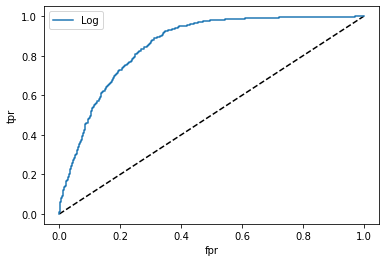

In [340]:
# Reciever operating characteristics Curve for train
probtr=model.predict_proba(X_train_std)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probtr )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Log')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [341]:
metrics.roc_auc_score(y_train,probtr)

0.8545252388265093

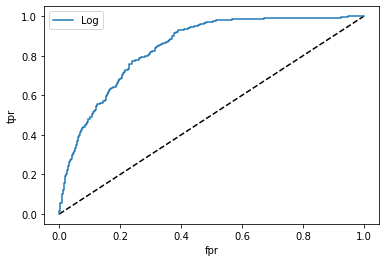

In [342]:
# Reciever operating characteristics Curve for train
probs=model.predict_proba(X_test_std)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_test,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Log')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [343]:
metrics.roc_auc_score(y_test,probs)

0.8435618043350908

for test we are covering 84% area and train we cover 85% area if the graph which is a good amount

#### Using DecisionTreeClassifier algorithm for creating Model

In [344]:
from sklearn.tree import DecisionTreeClassifier

In [345]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6],
              "min_samples_leaf":[2,5,10]
             }


dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, parameters, cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train_std, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [346]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [347]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[6,7,8],
              "min_samples_leaf":[2,5,10]
             }


dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, parameters, cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train_std, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [348]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [349]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[8,9,10],
              "min_samples_leaf":[10,12,13]
             }


dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, parameters, cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train_std, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 9, 10],
                         'min_samples_leaf': [10, 12, 13],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [350]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [351]:
dt1=DecisionTreeClassifier(criterion= 'entropy',
                           max_depth=8,
                           min_samples_leaf= 10,
                           min_samples_split= 2)

mod_dt=dt1.fit(X_train_std,y_train)



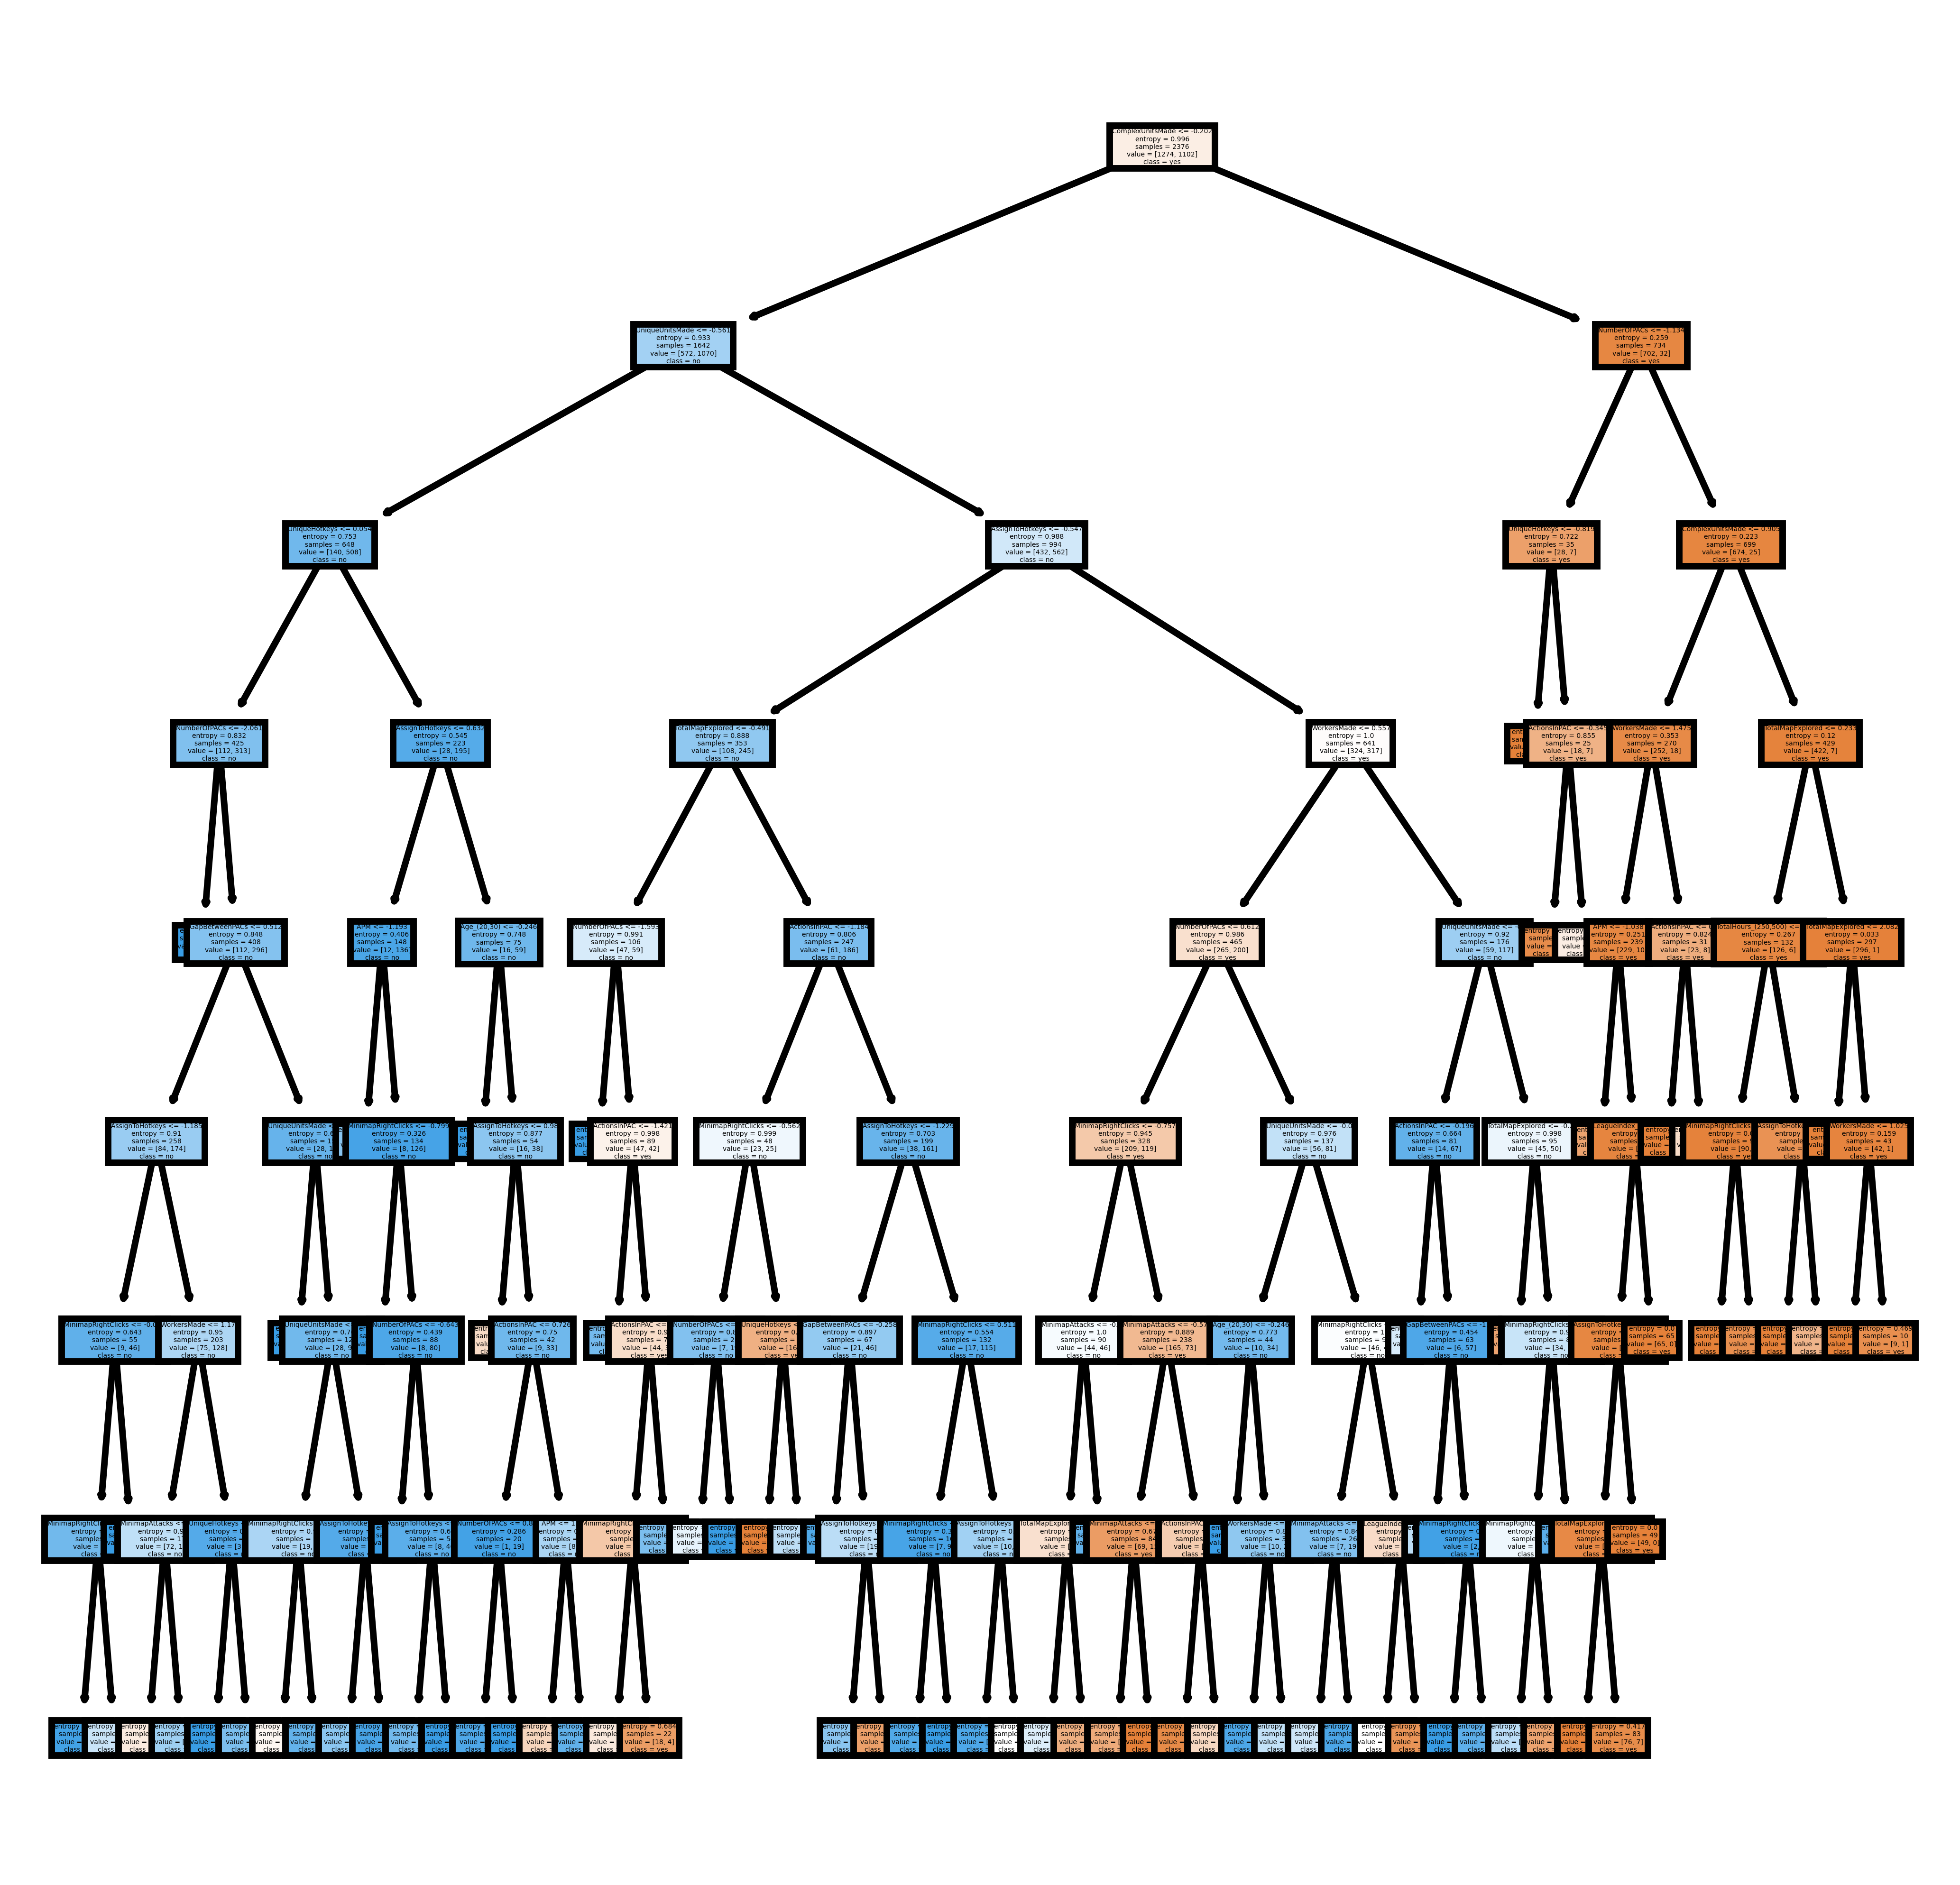

In [352]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt1,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [353]:
rules=tree.export_text(dt1, feature_names=X_train.columns.to_list())
print(rules)

|--- ComplexUnitsMade <= -0.20
|   |--- UniqueUnitsMade <= -0.56
|   |   |--- UniqueHotkeys <= 0.05
|   |   |   |--- NumberOfPACs <= -2.06
|   |   |   |   |--- class: 1.0
|   |   |   |--- NumberOfPACs >  -2.06
|   |   |   |   |--- GapBetweenPACs <= 0.51
|   |   |   |   |   |--- AssignToHotkeys <= -1.19
|   |   |   |   |   |   |--- MinimapRightClicks <= -0.00
|   |   |   |   |   |   |   |--- MinimapRightClicks <= -0.59
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- MinimapRightClicks >  -0.59
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- MinimapRightClicks >  -0.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- AssignToHotkeys >  -1.19
|   |   |   |   |   |   |--- WorkersMade <= 1.17
|   |   |   |   |   |   |   |--- MinimapAttacks <= -0.60
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- MinimapAttacks >  -0.60
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |  

In [354]:
dt1.feature_importances_

array([0.00993592, 0.06641337, 0.02396582, 0.0257932 , 0.06339759,
       0.05094823, 0.01479079, 0.03975438, 0.02562967, 0.0347269 ,
       0.08024762, 0.54155798, 0.01122111, 0.        , 0.        ,
       0.00441676, 0.        , 0.        , 0.        , 0.        ,
       0.00290308, 0.00429757, 0.        , 0.        , 0.        ])

In [355]:
print("Train Score :", mod_dt.score(X_train_std, y_train))
print("------------------------------------------------------")
print("Test Score :", mod_dt.score(X_test_std, y_test))

Train Score : 0.8211279461279462
------------------------------------------------------
Test Score : 0.7134445534838076


In [356]:
pred_train=mod_dt.predict(X_train_std)
pred_test=mod_dt.predict(X_test_std)

print("train")
print(metrics.classification_report(y_train, pred_train))
print("*************************************************************************************")
print("test")
print(metrics.classification_report(y_test, pred_test))

train
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1274
         1.0       0.82      0.79      0.80      1102

    accuracy                           0.82      2376
   macro avg       0.82      0.82      0.82      2376
weighted avg       0.82      0.82      0.82      2376

*************************************************************************************
test
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       569
         1.0       0.68      0.67      0.67       450

    accuracy                           0.71      1019
   macro avg       0.71      0.71      0.71      1019
weighted avg       0.71      0.71      0.71      1019



It is a overfit model with 82% accuracy in train and 72% accuracy in test

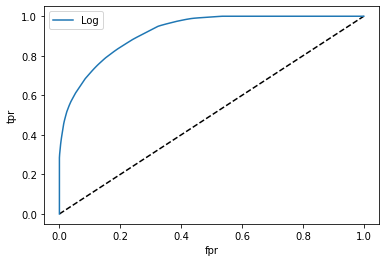

In [357]:
# Reciever operating characteristics Curve for train
probtr=mod_dt.predict_proba(X_train_std)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probtr )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Log')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [358]:
print("for train : ",metrics.roc_auc_score(y_train,probtr))

for train :  0.919948958223524


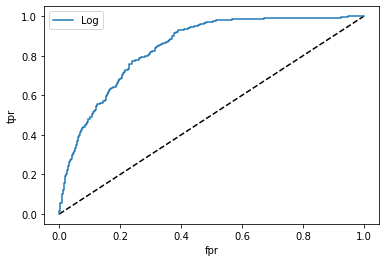

In [359]:
# Reciever operating characteristics Curve for train
probs=model.predict_proba(X_test_std)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_test,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Log')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [360]:
print("for test : ",metrics.roc_auc_score(y_test,probs))

for test :  0.8435618043350908


### From above both analysis we can say that,

`Logistic Regression` is working better as it overfit the model by only 2% and roc curve for both train and test cover almost 85% of the area

`Descision Tree` required more data to give good result